Data taken from
https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand
Model made to explain the probabilities of a booking to be canceled

In [1]:
#Library Import
import pandas as pd
from pandas import DataFrame as df
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Data Import
raw_data = pd.read_csv("hotel_bookings.csv")

### Initial exploration

In [3]:
# Shape
raw_data.shape

(119390, 32)

In [4]:
## Initial view
raw_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#Existing columns
columns_raw_data = raw_data.columns.values.tolist()
#Existing columns dataframe 
df([columns_raw_data],index=["Columns"]).T

,Columns
0,hotel
1,is_canceled
2,lead_time
3,arrival_date_year
4,arrival_date_month
5,arrival_date_week_number
6,arrival_date_day_of_month
7,stays_in_weekend_nights
8,stays_in_week_nights
9,adults


In [6]:
#Initial view of columns
pd.set_option('display.max_columns',raw_data.shape[1]+1) #Show all columns in pandas
raw_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Variable classification

In [7]:
#Variable types
raw_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
#Variable classification according to type
numerical_variables=["lead_time",
                     "adults",
                     "company",
                     "children",
                     "babies",
                     "booking_changes",
                     "days_in_waiting_list",
                     "adr"]
numeric_categorial_variables=["is_canceled",
                              "stays_in_weekend_nights",
                              "stays_in_week_nights",
                              "agent",
                              "is_repeated_guest",
                              "previous_cancellations",
                              "previous_bookings_not_canceled",
                              "required_car_parking_spaces",
                              "total_of_special_requests"]
total_categoricals=["hotel",
                             "meal",
                             "country",
                             "arrival_date_month",
                             "market_segment",
                             "distribution_channel",
                             "reserved_room_type",
                             "assigned_room_type",
                             "deposit_type",                             
                             "customer_type",
                             "reservation_status"]
date_variables=["arrival_date_year",
                   "arrival_date_week_number",
                   "arrival_date_day_of_month",
                   "arrival_date_month",
                   "reservation_status_date"]


#Categorical variables: Numerical and text
categorical_variables = total_categoricals + numeric_categorial_variables
graphable_variables = numerical_variables+categorical_variables
#Existing variable types
types_of_variables = ["numerical_variables",
                     "numeric_categorial_variables",
                     "total_categoricals",
                     "date_variables"]
percentable_variables = numeric_categorial_variables+total_categoricals +date_variables

In [9]:
#Initial dataframe creation for making transformations
data_initial = raw_data.copy()

### Conversion of types from categorical to numerical

In [10]:
#Text to numerical columns
for column_to_convert_to_numerical in total_categoricals:
    #If is not in columns to sort in specific order
    if column_to_convert_to_numerical not in  ["arrival_date_month","reserved_room_type","assigned_room_type"]:  
        for j,i in enumerate(data_initial[column_to_convert_to_numerical].unique()):
            data_initial.loc[(data_initial[column_to_convert_to_numerical] == i) ,column_to_convert_to_numerical] = j 
    #Sort in specific order: arrival_date_month
    elif column_to_convert_to_numerical == "arrival_date_month":
        for m,n in zip(['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'],range(1,12+1)):  
            data_initial.loc[(data_initial["arrival_date_month"] == m) ,"arrival_date_month"] = n   
    #Sort in specific order: reserved_room_type 
    elif column_to_convert_to_numerical == "reserved_room_type":
        for l,n in zip(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'L', 'P'],range(10)):  
            data_initial.loc[(data_initial["reserved_room_type"] == l) ,"reserved_room_type"] = n
    #Sort in specific order: assigned_room_type 
    elif column_to_convert_to_numerical == "assigned_room_type":
        for l,n in zip(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'],range(12)):  
            data_initial.loc[(data_initial["assigned_room_type"] == l) ,"assigned_room_type"] = n   

In [11]:
#Equivalence of text columns in numbers
for i in total_categoricals:
    display(pd.concat([raw_data[i],data_initial[i]],axis=1).drop_duplicates(subset=[i]))

,hotel,hotel
0,Resort Hotel,0
40060,City Hotel,1


,meal,meal
0,BB,0
7,FB,1
9,HB,2
1655,SC,3
3106,Undefined,4


,country,country
0,PRT,0
2,GBR,1
12,USA,2
13,ESP,3
15,IRL,4
...,...,...
113817,KIR,173
113912,SDN,174
115334,ATF,175
117399,SLE,176


,arrival_date_month,arrival_date_month
0,July,7
842,August,8
1485,September,9
2087,October,10
2835,November,11
3271,December,12
3738,January,1
3864,February,2
4275,March,3
4803,April,4


,market_segment,market_segment
0,Direct,0
3,Corporate,1
4,Online TA,2
9,Offline TA/TO,3
125,Complementary,4
413,Groups,5
40600,Undefined,6
49013,Aviation,7


,distribution_channel,distribution_channel
0,Direct,0
3,Corporate,1
4,TA/TO,2
14594,Undefined,3
43284,GDS,4


,reserved_room_type,reserved_room_type
0,C,2
2,A,0
9,D,3
10,E,4
13,G,6
20,F,5
54,H,7
354,L,8
4127,P,9
15796,B,1


,assigned_room_type,assigned_room_type
0,C,2
3,A,0
9,D,3
10,E,4
13,G,6
20,F,5
24,I,8
48,B,1
54,H,7
4127,P,11


,deposit_type,deposit_type
0,No Deposit,0
1559,Refundable,1
2133,Non Refund,2


,customer_type,customer_type
0,Transient,0
16,Contract,1
47,Transient-Party,2
539,Group,3


,reservation_status,reservation_status
0,Check-Out,0
8,Canceled,1
122,No-Show,2


### Variable charts

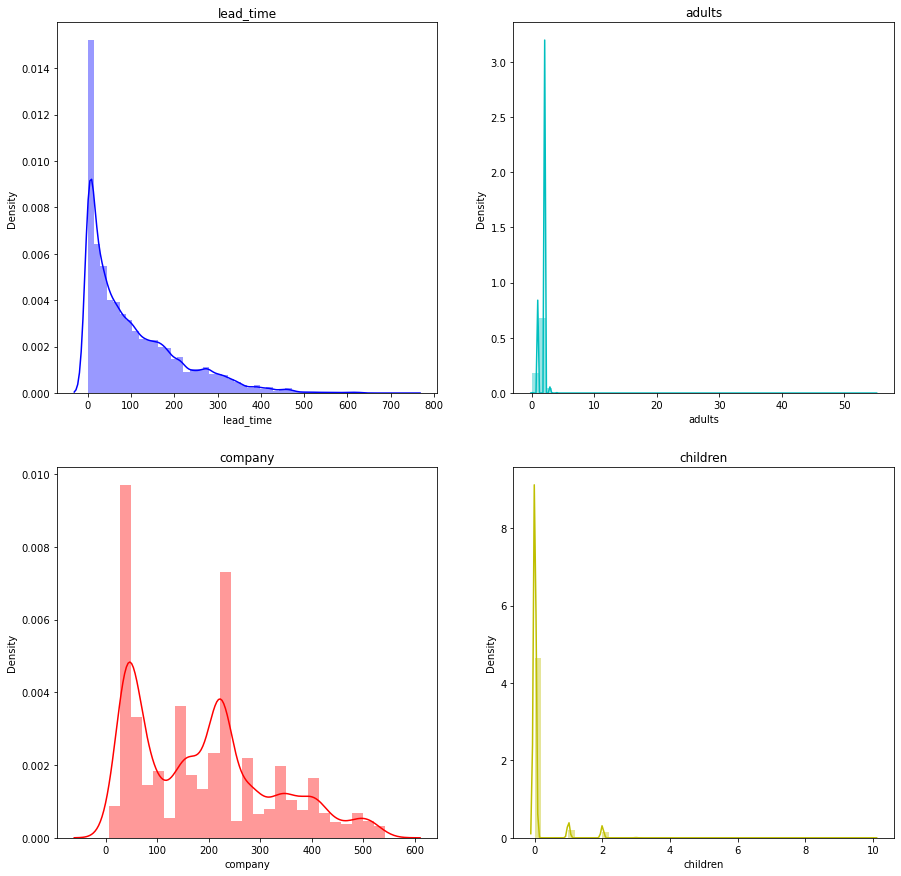

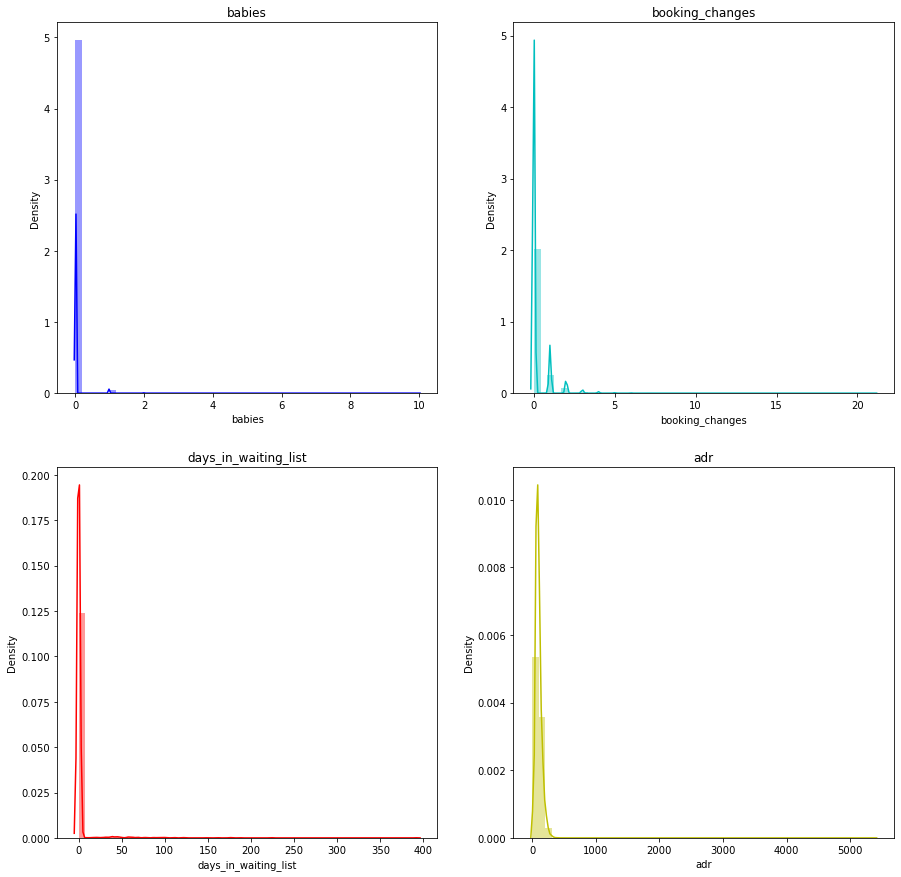

In [12]:
#Import libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

f=plt.figure(figsize=(15,15))

data = "data_initial"
for i,j,c in zip([1,2,3,4],numerical_variables[0:4],["b","c","r",'y']):
    ni = str(i)
    variable = "v"+ni
    exec(variable+"='"+j+"'")
    exec("ax"+ni+"=f.add_subplot("+str(i+220)+")")
    exec("sns.distplot("+data+".loc[:,"+variable+"].dropna(),color='"+c+"',ax=ax"+ni+")")
    exec("ax"+str(i)+".set_title("+variable+")")


f=plt.figure(figsize=(15,15))
for i,j,c in zip([1,2,3,4],numerical_variables[4:8],["b","c","r",'y']):
    ni = str(i)
    variable = "v"+ni
    exec(variable+"='"+j+"'")
    exec("ax"+ni+"=f.add_subplot("+str(i+220)+")")
    exec("sns.distplot("+data+".loc[:,"+variable+"].dropna(),color='"+c+"',ax=ax"+ni+")")
    exec("ax"+str(i)+".set_title("+variable+")")

hotel


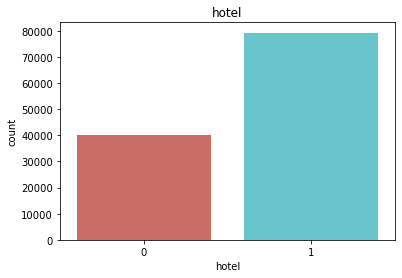

meal


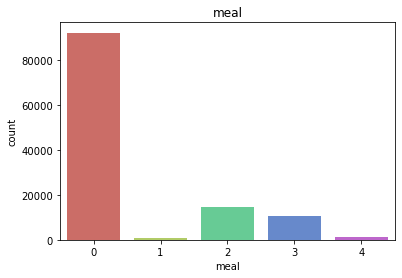

country


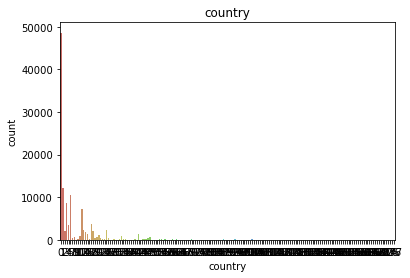

arrival_date_month


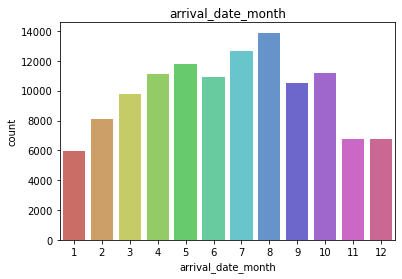

market_segment


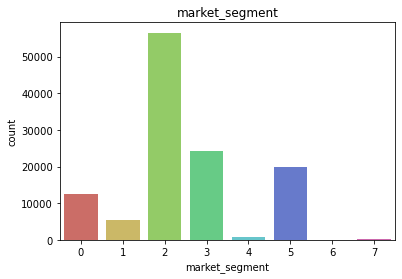

distribution_channel


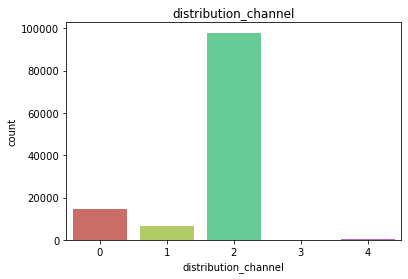

reserved_room_type


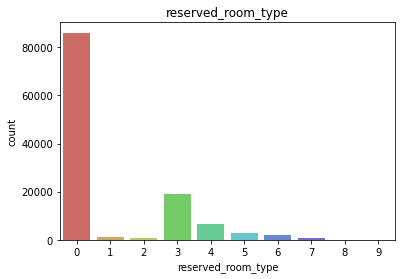

assigned_room_type


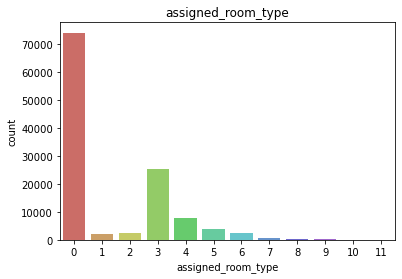

deposit_type


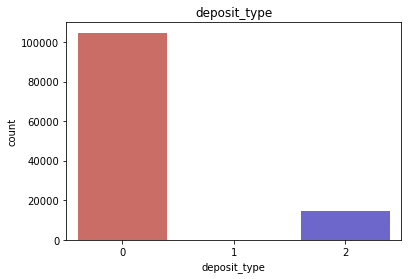

customer_type


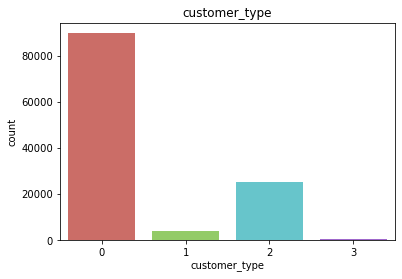

reservation_status


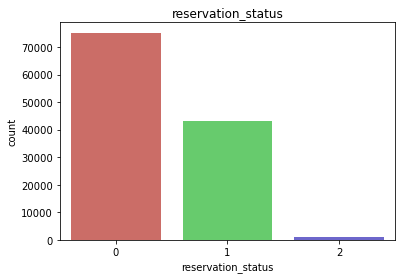

is_canceled


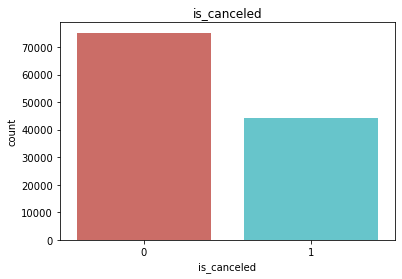

stays_in_weekend_nights


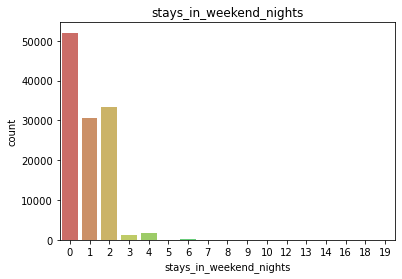

stays_in_week_nights


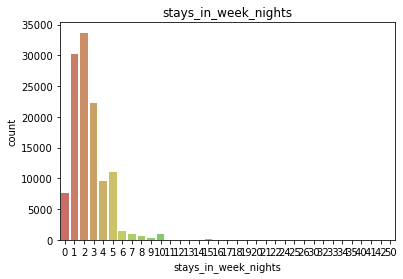

agent


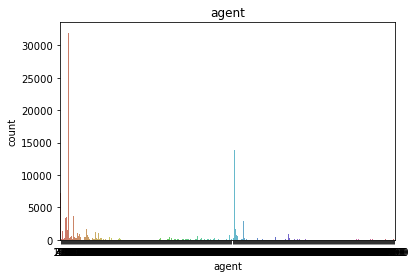

is_repeated_guest


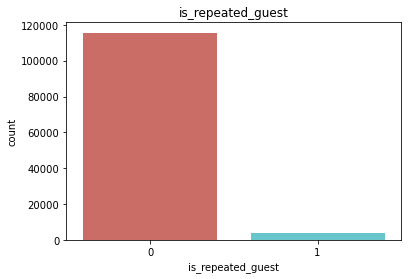

previous_cancellations


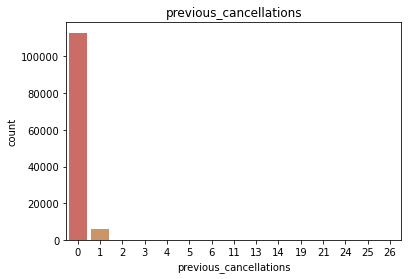

previous_bookings_not_canceled


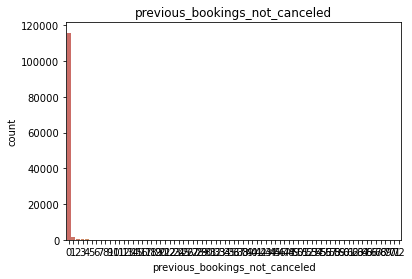

required_car_parking_spaces


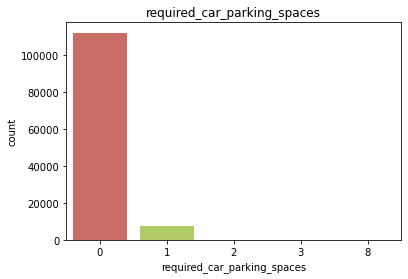

total_of_special_requests


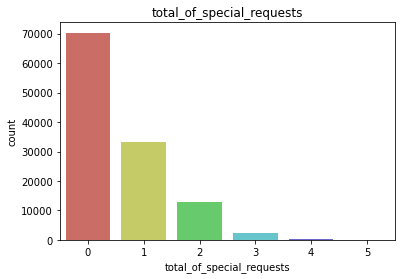

In [13]:
#Numerical categorical variables distrubition charts 
for i in range(len(categorical_variables)):
    print(categorical_variables[i])
    sns.countplot(x=categorical_variables[i],data= data_initial, palette = 'hls')
    plt.savefig('count_plot')
    plt.title(eval("categorical_variables["+str(i)+"]"))
    plot1 = plt.show()

#### Categorical variables count

In [14]:
#Equivalence of text columns in numbers
for i in total_categoricals:
    display(pd.concat([raw_data[i],data_initial[i]],axis=1).drop_duplicates(subset=[i]))

,hotel,hotel
0,Resort Hotel,0
40060,City Hotel,1


,meal,meal
0,BB,0
7,FB,1
9,HB,2
1655,SC,3
3106,Undefined,4


,country,country
0,PRT,0
2,GBR,1
12,USA,2
13,ESP,3
15,IRL,4
...,...,...
113817,KIR,173
113912,SDN,174
115334,ATF,175
117399,SLE,176


,arrival_date_month,arrival_date_month
0,July,7
842,August,8
1485,September,9
2087,October,10
2835,November,11
3271,December,12
3738,January,1
3864,February,2
4275,March,3
4803,April,4


,market_segment,market_segment
0,Direct,0
3,Corporate,1
4,Online TA,2
9,Offline TA/TO,3
125,Complementary,4
413,Groups,5
40600,Undefined,6
49013,Aviation,7


,distribution_channel,distribution_channel
0,Direct,0
3,Corporate,1
4,TA/TO,2
14594,Undefined,3
43284,GDS,4


,reserved_room_type,reserved_room_type
0,C,2
2,A,0
9,D,3
10,E,4
13,G,6
20,F,5
54,H,7
354,L,8
4127,P,9
15796,B,1


,assigned_room_type,assigned_room_type
0,C,2
3,A,0
9,D,3
10,E,4
13,G,6
20,F,5
24,I,8
48,B,1
54,H,7
4127,P,11


,deposit_type,deposit_type
0,No Deposit,0
1559,Refundable,1
2133,Non Refund,2


,customer_type,customer_type
0,Transient,0
16,Contract,1
47,Transient-Party,2
539,Group,3


,reservation_status,reservation_status
0,Check-Out,0
8,Canceled,1
122,No-Show,2


In [15]:
#Equivalence of text columns in numbers
equivalences = []
for i in total_categoricals:
    display(pd.concat([raw_data[i],data_initial[i]],axis=1).drop_duplicates(subset=[i]))
    exec("equivalence_"+i + " = " + "pd.concat([raw_data['"+i+"'],data_initial['"+i+"']],axis=1).drop_duplicates(subset=['"+i+"'])")  
    equivalences.append("equivalence_"+i)

,hotel,hotel
0,Resort Hotel,0
40060,City Hotel,1


,meal,meal
0,BB,0
7,FB,1
9,HB,2
1655,SC,3
3106,Undefined,4


,country,country
0,PRT,0
2,GBR,1
12,USA,2
13,ESP,3
15,IRL,4
...,...,...
113817,KIR,173
113912,SDN,174
115334,ATF,175
117399,SLE,176


,arrival_date_month,arrival_date_month
0,July,7
842,August,8
1485,September,9
2087,October,10
2835,November,11
3271,December,12
3738,January,1
3864,February,2
4275,March,3
4803,April,4


,market_segment,market_segment
0,Direct,0
3,Corporate,1
4,Online TA,2
9,Offline TA/TO,3
125,Complementary,4
413,Groups,5
40600,Undefined,6
49013,Aviation,7


,distribution_channel,distribution_channel
0,Direct,0
3,Corporate,1
4,TA/TO,2
14594,Undefined,3
43284,GDS,4


,reserved_room_type,reserved_room_type
0,C,2
2,A,0
9,D,3
10,E,4
13,G,6
20,F,5
54,H,7
354,L,8
4127,P,9
15796,B,1


,assigned_room_type,assigned_room_type
0,C,2
3,A,0
9,D,3
10,E,4
13,G,6
20,F,5
24,I,8
48,B,1
54,H,7
4127,P,11


,deposit_type,deposit_type
0,No Deposit,0
1559,Refundable,1
2133,Non Refund,2


,customer_type,customer_type
0,Transient,0
16,Contract,1
47,Transient-Party,2
539,Group,3


,reservation_status,reservation_status
0,Check-Out,0
8,Canceled,1
122,No-Show,2


In [16]:
#Numerical categorical variables counts
ratios = []
for i in range(len(percentable_variables)):
    if percentable_variables[i] in total_categoricals:
        count = df([raw_data[percentable_variables[i]].value_counts()])
        ratio = count*100/count.sum(axis=1)[0]
        exec("ratio_"+percentable_variables[i]+"="+"ratio.copy()")
        ratios.append("ratio_"+percentable_variables[i])
    else:
        count = df([data_initial[percentable_variables[i]].value_counts()])
        ratio = count*100/count.sum(axis=1)[0]
        exec("ratio_"+percentable_variables[i]+"="+"ratio.copy()")
        ratios.append("ratio_"+percentable_variables[i])
for i in ratios:
    display(eval(i))

,0,1
is_canceled,62.958372,37.041628


,0,2,1,4,3,6,5,8,7,9,10,12,13,16,14,18,19
stays_in_weekend_nights,43.553061,27.898484,25.652065,1.553731,1.054527,0.128151,0.06617,0.050255,0.015914,0.009214,0.005863,0.004188,0.002513,0.002513,0.001675,0.000838,0.000838


,2,1,3,5,4,0,6,10,7,8,9,15,11,19,12,20,...,21,22,25,18,30,17,24,40,33,42,50,32,26,34,35,41
stays_in_week_nights,28.213418,25.387386,18.643102,9.277996,8.009884,6.403384,1.255549,0.867744,0.861881,0.54946,0.193484,0.071195,0.046905,0.036854,0.035179,0.034341,...,0.012564,0.005863,0.005026,0.005026,0.004188,0.00335,0.002513,0.001675,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838


,9.0,240.0,1.0,14.0,7.0,6.0,250.0,241.0,28.0,8.0,3.0,37.0,19.0,40.0,314.0,21.0,...,144.0,451.0,216.0,294.0,59.0,267.0,450.0,247.0,278.0,280.0,285.0,289.0,432.0,265.0,93.0,304.0
agent,31.015041,13.509947,6.978166,3.532266,3.434255,3.192625,2.785056,1.670063,1.616691,1.46919,1.296458,1.193595,1.029597,1.008248,0.899563,0.849102,...,0.00097,0.00097,0.00097,0.00097,0.00097,0.00097,0.00097,0.00097,0.00097,0.00097,0.00097,0.00097,0.00097,0.00097,0.00097,0.00097


,0,1
is_repeated_guest,96.808778,3.191222


,0,1,2,3,24,11,4,26,25,6,19,5,14,13,21
previous_cancellations,94.569059,5.068264,0.097161,0.054443,0.040204,0.029316,0.025965,0.021777,0.02094,0.018427,0.015914,0.015914,0.011726,0.010051,0.000838


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,...,34,35,37,38,39,40,42,52,43,45,46,47,49,50,51,72
previous_bookings_not_canceled,96.96792,1.291565,0.485803,0.278918,0.191808,0.151604,0.096323,0.073708,0.058631,0.050255,0.044392,0.036016,0.030991,0.025128,0.023453,0.017589,...,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838


,0,1,2,3,8
required_car_parking_spaces,93.788424,6.183935,0.023453,0.002513,0.001675


,0,1,2,3,4,5
total_of_special_requests,58.89773,27.829801,10.862719,2.091465,0.284781,0.033504


,City Hotel,Resort Hotel
hotel,66.446101,33.553899


,BB,HB,SC,Undefined,FB
meal,77.318033,12.11408,8.920345,0.979144,0.668398


,PRT,GBR,FRA,ESP,DEU,ITA,IRL,BEL,BRA,NLD,USA,CHE,CN,AUT,SWE,CHN,...,BDI,PLW,MLI,CYM,BFA,MDG,MMR,NPL,BHS,UMI,SMR,DJI,BWA,HND,VGB,NAM
country,40.865587,10.200838,8.759314,7.205934,6.128576,3.167314,2.838472,1.969689,1.870448,1.769524,1.763637,1.45498,1.075676,1.062219,0.861213,0.840188,...,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841,0.000841


,August,July,May,October,April,June,September,March,February,November,December,January
arrival_date_month,11.623252,10.604741,9.876037,9.347517,9.288048,9.162409,8.801407,8.203367,6.757685,5.690594,5.678868,4.966078


,Online TA,Offline TA/TO,Groups,Direct,Corporate,Complementary,Aviation,Undefined
market_segment,47.304632,20.285619,16.593517,10.558673,4.435045,0.62233,0.198509,0.001675


,TA/TO,Direct,Corporate,GDS,Undefined
distribution_channel,81.97504,12.266521,5.592596,0.161655,0.004188


,A,D,E,F,G,B,C,H,P,L
reserved_room_type,72.027808,16.082586,5.473658,2.426501,1.753916,0.936427,0.780635,0.503392,0.010051,0.005026


,A,D,E,F,G,C,B,H,I,K,P,L
assigned_room_type,62.026133,21.209482,6.538236,3.141804,2.13837,1.989279,1.81171,0.596365,0.304046,0.233688,0.010051,0.000838


,No Deposit,Non Refund,Refundable
deposit_type,87.646369,12.217941,0.13569


,Transient,Transient-Party,Contract,Group
customer_type,75.05905,21.043638,3.414021,0.48329


,Check-Out,Canceled,No-Show
reservation_status,62.958372,36.030656,1.010972


,2016,2017,2015
arrival_date_year,47.497278,34.079069,18.423654


,33,30,32,34,18,21,28,17,20,29,42,31,41,15,27,25,...,11,45,53,49,47,46,6,50,48,4,5,3,2,52,1,51
arrival_date_week_number,2.998576,2.585644,2.550465,2.546277,2.450792,2.390485,2.389647,2.349443,2.332691,2.314264,2.308401,2.295837,2.260658,2.252282,2.231343,2.230505,...,1.733814,1.625764,1.521065,1.492587,1.411341,1.318368,1.263087,1.260575,1.259737,1.245498,1.161739,1.104783,1.020186,1.000921,0.876958,0.781472


,17,5,15,25,26,9,12,16,2,19,20,18,24,28,8,3,30,6,14,27,21,4,13,7,1,23,11,22,29,10,31
arrival_date_day_of_month,3.690426,3.615881,3.514532,3.484379,3.47349,3.430773,3.423235,3.415696,3.396432,3.393919,3.377167,3.35204,3.344501,3.305134,3.284195,3.228914,3.227238,3.210487,3.19876,3.184521,3.155206,3.151855,3.136779,3.069771,3.037105,3.028729,3.01449,3.011978,2.998576,2.994388,1.849401


,August,July,May,October,April,June,September,March,February,November,December,January
arrival_date_month,11.623252,10.604741,9.876037,9.347517,9.288048,9.162409,8.801407,8.203367,6.757685,5.690594,5.678868,4.966078


,2015-10-21,2015-07-06,2016-11-25,2015-01-01,2016-01-18,2015-07-02,2016-12-07,2015-12-18,2016-02-09,2016-04-04,2017-01-24,2016-11-21,2016-03-15,2017-01-19,2017-02-02,2016-09-20,...,2015-03-18,2015-01-29,2017-09-12,2015-01-28,2015-03-12,2015-02-06,2015-02-09,2015-02-19,2015-03-30,2015-02-24,2015-02-26,2015-02-27,2015-04-25,2015-03-11,2015-06-14,2015-02-12
reservation_status_date,1.223721,0.674261,0.661697,0.639082,0.523494,0.39283,0.376916,0.354301,0.345088,0.31996,0.287294,0.284781,0.275567,0.268867,0.263841,0.25379,...,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838,0.000838


In [17]:
#Hotel types ratio
ratio_hotel

,City Hotel,Resort Hotel
hotel,66.446101,33.553899


#### In what countries hotels are more canceled

In [18]:
#In what countries hotels are more canceled
#In what countries hotels are more canceled in average
pd.set_option('display.max_rows',raw_data.shape[0]+1) #Show all rows in pandas
equivalence_country.columns=["county name","country code"]
average_canceled_hotels_by_country = data_initial[["country","is_canceled"]].groupby("country").mean()
average_canceled_hotels_by_country = average_canceled_hotels_by_country.reset_index()
average_canceled_hotels_by_country = pd.merge(average_canceled_hotels_by_country,
         equivalence_country,
         left_on = "country",
         right_on = "country code",how="inner")
average_canceled_hotels_by_country = average_canceled_hotels_by_country[["county name","is_canceled"]]
average_canceled_hotels_by_country.columns = ["Country","is_canceled"]

#In what countries hotels are more canceled in total
total_canceled_hotels_by_country = data_initial[["country","is_canceled"]].groupby("country").sum()
total_canceled_hotels_by_country = total_canceled_hotels_by_country.reset_index()
total_canceled_hotels_by_country = pd.merge(total_canceled_hotels_by_country,
         equivalence_country,
         left_on = "country",
         right_on = "country code",how="inner")
total_canceled_hotels_by_country = total_canceled_hotels_by_country[["county name","is_canceled"]]
total_canceled_hotels_by_country.columns = ["Country","is_canceled"]

canceled_hotels_by_country = pd.merge(total_canceled_hotels_by_country,
                                      average_canceled_hotels_by_country,
                                      left_on="Country",
                                      right_on="Country",
                                      how = "inner")
canceled_hotels_by_country.columns = ["Country","Total cancelations","Percentage cancelations"]
canceled_hotels_by_country = canceled_hotels_by_country.sort_values(
    by=["Total cancelations","Percentage cancelations"],ascending=False)
canceled_hotels_by_country[canceled_hotels_by_country["Total cancelations"]>0]

,Country,Total cancelations,Percentage cancelations
0,PRT,27519,0.566351
1,GBR,2453,0.202243
3,ESP,2177,0.254085
5,FRA,1934,0.185694
16,ITA,1333,0.353956
11,DEU,1218,0.167147
4,IRL,832,0.246519
24,BRA,830,0.373201
2,USA,501,0.238913
12,BEL,474,0.202391


#### What times was the most reserved and in what hotel type

In [19]:
#What are the day of the month, week and year more reserved
date_reservations_count = []
for i in ['arrival_date_year']:
    exec("total_"+i+"="+"df(data_initial['"+i+"'].value_counts()).T")
    exec("total_"+i+".index=['total_"+i+"']")
    exec("ratio_"+i+".index=['"+i+" %']")
    exec("count_"+i+"="+"pd.concat([total_"+i+",ratio_"+i+"])")
    exec("count_"+i+"="+"count_"+i+".T.sort_index().T")
    date_reservations_count.append("count_"+i) 

In [20]:
#What are the day of the month, week and year more reserved per hotel type
date_reservations_count = []
date_reservations_ratio = []
date_reservations_counts_and_ratio = []
for i in date_variables[:4]:
    exec("count_"+i+"="+"pd.crosstab(data_initial['hotel'],data_initial['"+i+"'])")
    exec("ratio_"+i+"_per_hotel"+"="+"pd.crosstab(data_initial['hotel'],data_initial['"+i+"'], normalize = 'columns')")
    date_reservations_count.append("count_"+i)
    date_reservations_ratio.append("ratio_"+i+"_per_hotel")
    exec("ratio_"+i+"_per_hotel = 100*ratio_"+i+"_per_hotel")
    date_reservations_counts_and_ratio.append("count_and_ratio_"+i+"_per_hotel")
    exec("count_and_ratio_"+i+"_per_hotel"+"="+"pd.concat([count_"+i+",ratio_"+i+"_per_hotel"+"])")  
    exec("count_and_ratio_"+i+"_per_hotel.index = ['Resort hotel count','City hotel count','Resort hotel %','City hotel %']") 
    display(i,eval("count_and_ratio_"+i+"_per_hotel"))

'arrival_date_year'

arrival_date_year,2015,2016,2017
Resort hotel count,8314.000000,18567.00000,13179.000000
City hotel count,13682.000000,38140.00000,27508.000000
Resort hotel %,37.797781,32.74199,32.391181
City hotel %,62.202219,67.25801,67.608819


'arrival_date_week_number'

arrival_date_week_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,...,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53
Resort hotel count,343.000000,457.000000,553.000000,519.000000,501.000000,682.000000,904.000000,719.000000,795.000000,727.000000,679.000000,656.000000,811.000000,739.000000,906.000000,755.000000,...,774.000000,748.000000,675.0000,857.000000,724.000000,917.000000,726.000000,690.000000,514.000000,708.000000,493.000000,716.000000,449.000000,430.000000,592.000000,618.000000
City hotel count,704.000000,761.000000,766.000000,968.000000,886.000000,826.000000,1205.000000,1497.000000,1322.000000,1422.000000,1391.000000,1427.000000,1605.000000,1525.000000,1783.000000,1650.000000,...,1887.000000,1833.000000,1722.0000,1842.000000,2032.000000,1435.000000,1546.000000,1251.000000,1060.000000,977.000000,1011.000000,1066.000000,1056.000000,503.000000,603.000000,1198.000000
Resort hotel %,32.760267,37.520525,41.925701,34.902488,36.121125,45.225464,42.863917,32.445848,37.553141,33.829688,32.801932,31.493039,33.567881,32.641343,33.692823,31.392931,...,29.086809,28.981015,28.1602,31.752501,26.269956,38.988095,31.954225,35.548686,32.655654,42.017804,32.779255,40.179574,29.833887,46.087889,49.539749,34.030837
City hotel %,67.239733,62.479475,58.074299,65.097512,63.878875,54.774536,57.136083,67.554152,62.446859,66.170312,67.198068,68.506961,66.432119,67.358657,66.307177,68.607069,...,70.913191,71.018985,71.8398,68.247499,73.730044,61.011905,68.045775,64.451314,67.344346,57.982196,67.220745,59.820426,70.166113,53.912111,50.460251,65.969163


'arrival_date_day_of_month'

arrival_date_day_of_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
Resort hotel count,1294.000000,1388.000000,1325.000000,1302.000000,1460.000000,1192.000000,1206.000000,1245.000000,1404.000000,1185.000000,1272.000000,1577.00000,1140.000000,1219.000000,1322.000000,1426.000000,1394.000000,1378.000000,1305.000000,1197.0000,1200.000000,1270.000000,1169.00000,1370.000000,1337.000000,1399.00000,1265.000000,1276.000000,1214.000000,1473.000000,856.000000
City hotel count,2332.000000,2667.000000,2530.000000,2461.000000,2857.000000,2641.000000,2459.000000,2676.000000,2692.000000,2390.000000,2327.000000,2510.00000,2605.000000,2600.000000,2874.000000,2652.000000,3012.000000,2624.000000,2747.000000,2835.0000,2567.000000,2326.000000,2447.00000,2623.000000,2823.000000,2748.00000,2537.000000,2670.000000,2366.000000,2380.000000,1352.000000
Resort hotel %,35.686707,34.229346,34.370947,34.600053,33.819782,31.098356,32.905866,31.752104,34.277344,33.146853,35.343151,38.58576,30.440587,31.919351,31.506196,34.968122,31.638675,34.432784,32.206318,29.6875,31.855588,35.317019,32.32854,34.310043,32.139423,33.73523,33.271962,32.336543,33.910615,38.229951,38.768116
City hotel %,64.313293,65.770654,65.629053,65.399947,66.180218,68.901644,67.094134,68.247896,65.722656,66.853147,64.656849,61.41424,69.559413,68.080649,68.493804,65.031878,68.361325,65.567216,67.793682,70.3125,68.144412,64.682981,67.67146,65.689957,67.860577,66.26477,66.728038,67.663457,66.089385,61.770049,61.231884


'arrival_date_month'

arrival_date_month,1,2,3,4,5,6,7,8,9,10,11,12
Resort hotel count,2193.000000,3103.000000,3336.00000,3609.000000,3559.000000,3045.000000,4573.00000,4894.000000,3108.000000,3555.000000,2437.000000,2648.000000
City hotel count,3736.000000,4965.000000,6458.00000,7480.000000,8232.000000,7894.000000,8088.00000,8983.000000,7400.000000,7605.000000,4357.000000,4132.000000
Resort hotel %,36.987688,38.460585,34.06167,32.545766,30.184039,27.836182,36.11879,35.266989,29.577465,31.854839,35.869885,39.056047
City hotel %,63.012312,61.539415,65.93833,67.454234,69.815961,72.163818,63.88121,64.733011,70.422535,68.145161,64.130115,60.943953


#### Charts of hotel type per year

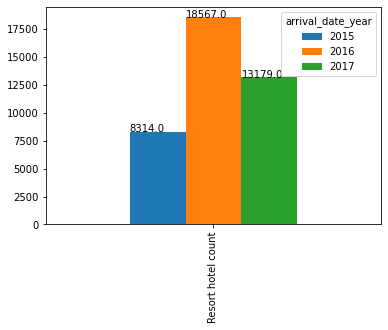

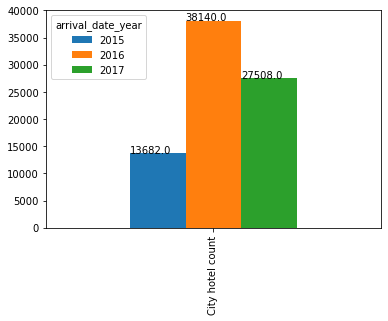

In [21]:
resort = count_and_ratio_arrival_date_year_per_hotel.iloc[[0],:]
city = count_and_ratio_arrival_date_year_per_hotel.iloc[[1],:]
ax = resort.plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height() ))
ax = city.plot.bar()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height() ))

#### Charts of hotel type per month

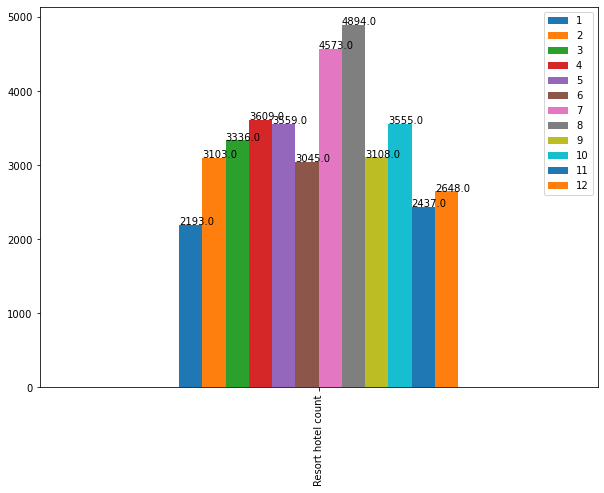

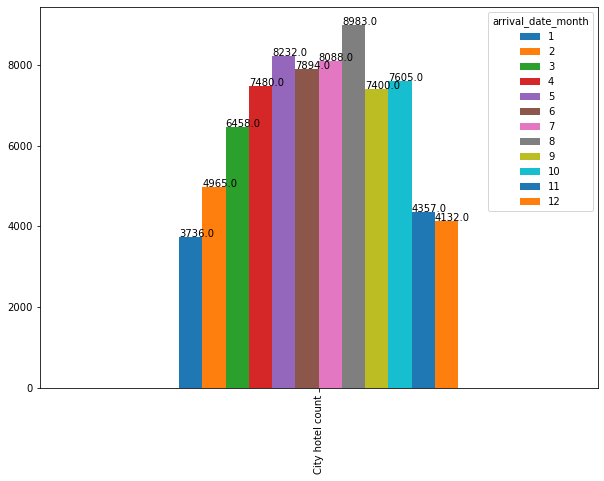

In [22]:
resort = count_and_ratio_arrival_date_month_per_hotel.iloc[[0],:]
city = count_and_ratio_arrival_date_month_per_hotel.iloc[[1],:]
ax = resort.plot.bar(figsize=(10,7))
ax.legend()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height() ))
ax = city.plot.bar(figsize=(10,7))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() , p.get_height() ))

### Checking if there is missing data

In [23]:
columns_with_missing_data =[]
for i in raw_data.columns:
    if raw_data[[i]][raw_data[i].isnull()].shape[0] == 0:
        pass
    else:
        columns_with_missing_data.append(i)

In [24]:
columns_with_missing_data

['children', 'country', 'agent', 'company']

In [25]:
#Percentage of empty columns that has at least one empty value
for i in columns_with_missing_data:
    print(i,data_initial[data_initial[i].isna()][[i]].shape[0]*100/data_initial.shape[0])

children 0.0033503643521232934
country 0.40874445095904177
agent 13.686238378423653
company 94.30689337465449


#### Replacing categorical data, creating a new category: Unknown.

In [26]:
#Create new dataframe to make models
data = data_initial.copy()

In [27]:
#Replace companies with no values with 999.
data.loc[data["company"].isna(),"company"] = 999
#Replace travel agency (agent) with no values with 999
data.loc[data["agent"].isna(),"agent"] = 999
#Replace country with no values with 999
data.loc[data["country"].isna(),"country"] = 999

#### Replacing categorical numerical data with most common value

In [28]:
#Values of children
data["children"].value_counts()
#0 is the most common value

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [29]:
#Replace children with most common value
data.loc[data["children"].isna(),"children"] = 0

In [30]:
pd.set_option('display.max_rows',10) 
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,0,342,2015,7,27,1,0,0,2,0.0,0,0,0,0,0,0,0,0,2,2,3,0,999.0,999.0,0,0,0.00,0,0,0,2015-07-01
1,0,0,737,2015,7,27,1,0,0,2,0.0,0,0,0,0,0,0,0,0,2,2,4,0,999.0,999.0,0,0,0.00,0,0,0,2015-07-01
2,0,0,7,2015,7,27,1,0,1,1,0.0,0,0,1,0,0,0,0,0,0,2,0,0,999.0,999.0,0,0,75.00,0,0,0,2015-07-02
3,0,0,13,2015,7,27,1,0,1,1,0.0,0,0,1,1,1,0,0,0,0,0,0,0,304.0,999.0,0,0,75.00,0,0,0,2015-07-02
4,0,0,14,2015,7,27,1,0,2,2,0.0,0,0,1,2,2,0,0,0,0,0,0,0,240.0,999.0,0,0,98.00,0,1,0,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,2017,8,35,30,2,5,2,0.0,0,0,13,3,2,0,0,0,0,0,0,0,394.0,999.0,0,0,96.14,0,0,0,2017-09-06
119386,1,0,102,2017,8,35,31,2,5,3,0.0,0,0,5,2,2,0,0,0,4,4,0,0,9.0,999.0,0,0,225.43,0,2,0,2017-09-07
119387,1,0,34,2017,8,35,31,2,5,2,0.0,0,0,12,2,2,0,0,0,3,3,0,0,9.0,999.0,0,0,157.71,0,4,0,2017-09-07
119388,1,0,109,2017,8,35,31,2,5,2,0.0,0,0,1,2,2,0,0,0,0,0,0,0,89.0,999.0,0,0,104.40,0,0,0,2017-09-07


Analysis related to variable "is_canceled"

In [75]:
pd.set_option('display.max_columns',35) 
#Mean of data whether the campaingn succeeded or not
display("Mean of data whether the booking was canceled",data_initial[list(numerical_variables)+["is_canceled"]].groupby('is_canceled').mean())
#Median of data whether the campaingn succeeded or not
display("Median of data whether the booking was canceled",data_initial[list(numerical_variables)+["is_canceled"]].groupby('is_canceled').median())

'Mean of data whether the booking was canceled'

,lead_time,adults,company,children,babies,booking_changes,days_in_waiting_list,adr
is_canceled,,,,,,,,
0,79.984687,1.829737,190.519265,0.102347,0.010377,0.293364,1.589868,99.987693
1,144.848815,1.901728,183.371117,0.106513,0.003821,0.098340,3.564083,104.964333


'Median of data whether the booking was canceled'

,lead_time,adults,company,children,babies,booking_changes,days_in_waiting_list,adr
is_canceled,,,,,,,,
0,45.0,2.0,183.0,0.0,0.0,0.0,0.0,92.5
1,113.0,2.0,169.0,0.0,0.0,0.0,0.0,96.2


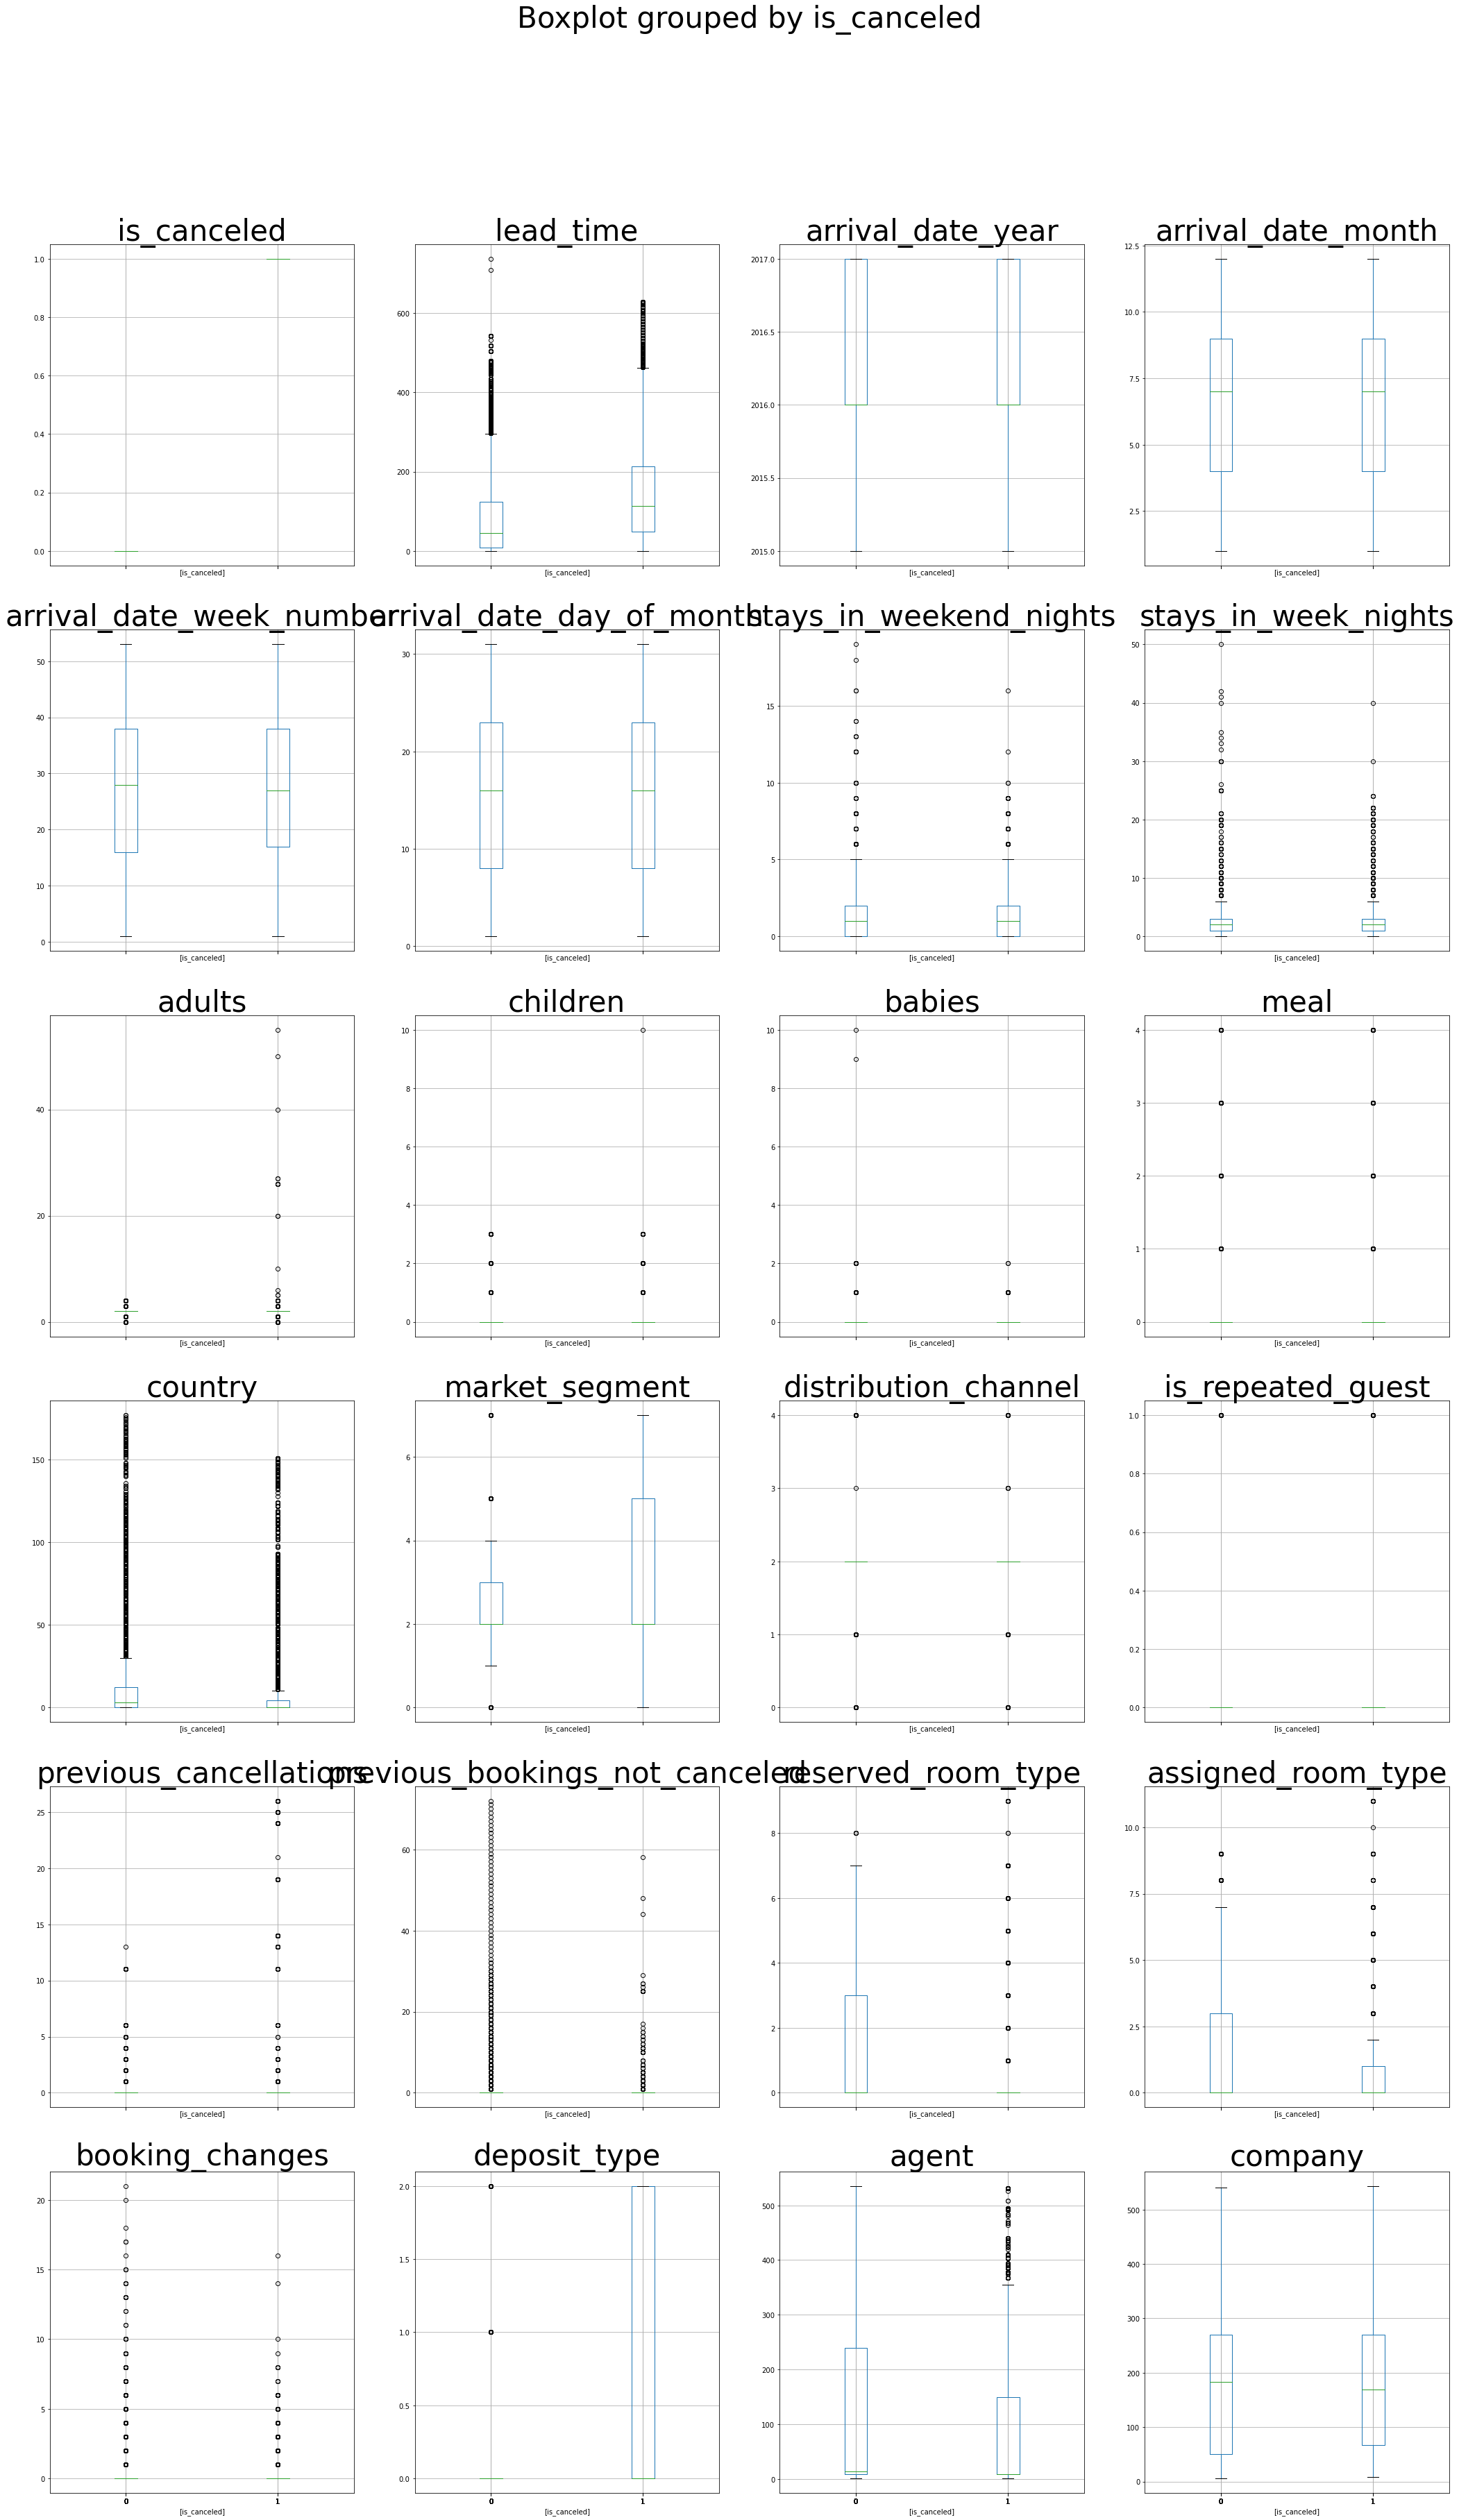

In [32]:
#Numerical variables vs is_canceled Boxplot
figure, axs = plt.subplots(6,4, sharey=False, sharex=True, figsize=(35,60))
plt.rcParams.update({'font.size': 35})

data_to_plot1 = data_initial
columns_of_data_to_plot1 = data_to_plot1.columns.to_list()

index = 1
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        try:
            boxplot = data_to_plot1.boxplot(column=[columns_of_data_to_plot1[index]],
                                               return_type='axes',
                                               by=['is_canceled'], 
                                               ax=axs[i][j]) 
            index += 1
        except IndexError:
            pass

In [33]:
#Correlation matrix between numerical variables
correlation_matrix_data = data_to_plot1
corr = correlation_matrix_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


### Data Transformation before model

We will do a model that predicts whether a booking is likeley to be canceled or not

#### Handling dates variables: set arrival time as days after the first day of the dataset

In [34]:
#Libraries import
import numpy as np
#Create a variable of date
data["date"] = data["arrival_date_year"].apply(str)+"/"+data["arrival_date_month"].apply(str)+"/"+data["arrival_date_day_of_month"].apply(str) 
#Create first day of the dataset
data["first date"] =  np.repeat(pd.to_datetime(["1/7/2015"],format= "%d/%m/%Y"),data.shape[0])
#Set date as date format
data["date"] = pd.to_datetime(data["date"],format= "%Y/%m/%d") 
data["first date"] = pd.to_datetime(data["first date"],format= "%Y/%m/%d") 
#Calculation of date difference in days
data['date in days'] =  data ['date'] - data ['first date'] 
data['date in days'] =  data ['date in days']  /  np.timedelta64 (1, 'D')
data=data.astype({"date in days":"int"})
#Drop date variables, are not necessary
data = data.drop(["date",
                  "first date",
                  "arrival_date_year",
                  'arrival_date_month',
                  "reservation_status_date",
                 "reservation_status"],axis=1) 

data

,hotel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,date in days
0,0,0,342,27,1,0,0,2,0.0,0,0,0,0,0,0,0,0,2,2,3,0,999.0,999.0,0,0,0.00,0,0,0
1,0,0,737,27,1,0,0,2,0.0,0,0,0,0,0,0,0,0,2,2,4,0,999.0,999.0,0,0,0.00,0,0,0
2,0,0,7,27,1,0,1,1,0.0,0,0,1,0,0,0,0,0,0,2,0,0,999.0,999.0,0,0,75.00,0,0,0
3,0,0,13,27,1,0,1,1,0.0,0,0,1,1,1,0,0,0,0,0,0,0,304.0,999.0,0,0,75.00,0,0,0
4,0,0,14,27,1,0,2,2,0.0,0,0,1,2,2,0,0,0,0,0,0,0,240.0,999.0,0,0,98.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,1,0,23,35,30,2,5,2,0.0,0,0,13,3,2,0,0,0,0,0,0,0,394.0,999.0,0,0,96.14,0,0,791
119386,1,0,102,35,31,2,5,3,0.0,0,0,5,2,2,0,0,0,4,4,0,0,9.0,999.0,0,0,225.43,0,2,792
119387,1,0,34,35,31,2,5,2,0.0,0,0,12,2,2,0,0,0,3,3,0,0,9.0,999.0,0,0,157.71,0,4,792
119388,1,0,109,35,31,2,5,2,0.0,0,0,1,2,2,0,0,0,0,0,0,0,89.0,999.0,0,0,104.40,0,0,792


### Data split

In [35]:
#Libraries import
from sklearn.model_selection import train_test_split
#Train and test
test_size = 0.31
train, test = train_test_split(data, test_size=test_size, random_state=99)
#Validation
validation, test = train_test_split(test, test_size=0.5, random_state=99)

In [36]:
# Setting X and Y train and test
Xtrain = train.drop("is_canceled", axis = 1)
Ytrain = train[["is_canceled"]]
Xtest = test.drop("is_canceled", axis = 1)
Ytest = test[["is_canceled"]]
Xvalidation = validation.drop("is_canceled", axis = 1)
Yvalidation = validation[["is_canceled"]]

In [37]:
#Saving X and Y indeces and columns
ColumnsX = Xtrain.columns.tolist() 
IndexXtrain = Xtrain.index.tolist()
IndexXtest = Xtest.index.tolist()
IndexXvalidation = Xvalidation.index.tolist()

#### Data Standardizing 

In [38]:
#Set variables that are worth to get standarized
variables_to_standarize = ["lead_time","stays_in_weekend_nights","stays_in_week_nights"]
date_variables.append(variables_to_standarize)

In [39]:
#Libraries import
from sklearn import preprocessing

Activate_standarization = True #Activate o deactivate standarization
if Activate_standarization is True:
    #Standarize just Standarization variables
    Xtrain_provisional = Xtrain[variables_to_standarize].copy()
    Xtest_provisional = Xtest[variables_to_standarize].copy()
    Xvalidation_provisional = Xvalidation[variables_to_standarize].copy()
    Xtrain_provisional = preprocessing.scale(Xtrain_provisional)
    Xtest_provisional = preprocessing.scale(Xtest_provisional)
    Xvalidation_provisional = preprocessing.scale(Xvalidation_provisional)
    Xtrain[variables_to_standarize] = Xtrain_provisional
    Xtest[variables_to_standarize] = Xtest_provisional
    Xvalidation[variables_to_standarize] = Xvalidation_provisional
else:
    pass

#### Feature Selection

In [40]:
#Libraries import
#Estimated execution time: 1:50
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
sele = RFECV(estimator=LogisticRegression(solver='liblinear'), cv=7, scoring='accuracy')
sele.fit(Xtrain, Ytrain)

RFECV(cv=7, estimator=LogisticRegression(solver='liblinear'),
      scoring='accuracy')

In [41]:
#List creation with selected variables
selected_variables = list(Xtrain.columns[(sele.get_support())])

In [42]:
print("There are altogether " +str(len(selected_variables)) +" selected variables and are\n")
print(selected_variables)

There are altogether 25 selected variables and are

['hotel', 'lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'date in days']


#### Working with selected variables

In [43]:
#Working with feature selection variables
Xtrain = Xtrain[selected_variables]
Xtest = Xtest[selected_variables]
Xvalidation = Xvalidation[selected_variables]

### Model of how likely is a booking to be canceled

#### Grid Search

In [44]:
#Import libraries of models
#Decision Tree
from sklearn.tree import DecisionTreeClassifier as tree
#Random Forest
from sklearn.ensemble import RandomForestClassifier as forest
#Ridge
from sklearn.linear_model import RidgeClassifier
#K nearest neighbors
from sklearn.neighbors import KNeighborsClassifier as knnc


#### Dictionary of models to do a Grid Search

In [45]:
#Dictionary structure
#Name to type: {"model": model function, "Parameters: {"Parameter1":[],"Parameter2":[]}"

#LinearRegression, LogisticRegression, Ridge, Lasso,tree,forest
grid_search_dictionary = {
            'Logistic Regression' : {
                    'Model' : LogisticRegression(solver = 'saga'),
                    'Parameter' : {'penalty' : ('l1','l2','elasticnet','none'),
                                'C': [0.8,0.6,0.4,1,2],
                                'l1_ratio':[0.1,0.3,0.5,0.7,0.9],
                                "max_iter":[10],
                                "random_state":[99]}},
           'Decision tree': {
                   'Model': tree(),
                   'Parameter':{'max_depth': [None,1,3,5,7],
                            'min_samples_leaf':[1,2,4,6,8],
                            "random_state":[99]}},
        'Random forest' : {
                    'Model' : forest(),
                    'Parameter' : {'max_depth' :[None, 1,3,5,7],
                            'min_samples_leaf':[1,5,6,8],
                            'n_estimators':[15,25,100],
                            "random_state":[99]}},
        'Knn' : {
                    'Model' : knnc(),
                    'Parameter' : {'n_neighbors' :[3, 5, 7, 11, 15]}},    
        'Ridge' : {
                    'Model' : RidgeClassifier(),
                    'Parameter' : {'alpha' :[-0.3, 0.01, 0.05, 0.1, 0.3, 0.5, 1, 1.5,
                                             2, 3, 5],
                                   "random_state":[99]}},
    } 

In [46]:
#Grid search dictionary organized
df(grid_search_dictionary).T

,Model,Parameter
Logistic Regression,LogisticRegression(solver='saga'),"{'penalty': ('l1', 'l2', 'elasticnet', 'none')..."
Decision tree,DecisionTreeClassifier(),"{'max_depth': [None, 1, 3, 5, 7], 'min_samples..."
Random forest,RandomForestClassifier(),"{'max_depth': [None, 1, 3, 5, 7], 'min_samples..."
Knn,KNeighborsClassifier(),"{'n_neighbors': [3, 5, 7, 11, 15]}"
Ridge,RidgeClassifier(),"{'alpha': [-0.3, 0.01, 0.05, 0.1, 0.3, 0.5, 1,..."


In [47]:
#Grid search execution

#Libraries import
import datetime as dat
from sklearn.model_selection import GridSearchCV

#Estimated execution time: 20:00
start = dat.datetime.now()
scores = []
for name_model, mp in grid_search_dictionary.items ():
    clf = GridSearchCV (mp[ 'Model'], mp['Parameter'], cv=5,)
    clf.fit(Xtrain, Ytrain) 
    scores.append({
    'Model': name_model,
    'Best score': clf.best_score_,
    'Best parameters': clf.best_params_})
end=dat.datetime.now()
print("Execution time: {}".format(end-start))

Execution time: 0:21:22.924642


In [48]:
#Best parameters of the models in grid search
pd.set_option('display.max_colwidth',100) #Show 100 characters in pandas column
grid_search_best_models = df(scores,columns=["Model","Best score",'Best parameters'])
grid_search_best_models.sort_values(by=["Best score"],ascending=False)

,Model,Best score,Best parameters
2,Random forest,0.884109,"{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 100, 'random_state': 99}"
1,Decision tree,0.844681,"{'max_depth': None, 'min_samples_leaf': 8, 'random_state': 99}"
4,Ridge,0.769322,"{'alpha': -0.3, 'random_state': 99}"
3,Knn,0.766105,{'n_neighbors': 3}
0,Logistic Regression,0.642324,"{'C': 0.8, 'l1_ratio': 0.1, 'max_iter': 10, 'penalty': 'l2', 'random_state': 99}"


#### Logistic Regression

In [49]:
#Libraries import
from datetime import datetime as date
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score#,roc_curve

##Logistic Regression
#Estimated execution time: 40:00
#Logistic regression set up variables
start=date.now()

C_log_reg = np.arange(0.6,1.2,0.02)
L1_ratio_log_reg = np.arange(0.01,0.3,0.02)
coefs_log_reg = df()
matrices_conf_log_reg = df()
accuracys_log_reg = df()
presicions_log_reg = df()
recalls_log_reg = df()
specificities_log_reg = df()
roc_aucs_log_reg = df()
F1s_log_reg = df()
Ys_estimated_log_reg = df()
indices_log_reg = np.array([])

for c in C_log_reg:
    for l in L1_ratio_log_reg:
        index_log_reg = [(str("C: "+str(c) + str(" L1 Ratio: "+str(l))))] 
        indices_log_reg = np.append(indices_log_reg,index_log_reg)
        #Model
        log_reg = LogisticRegression(C = c, l1_ratio = l, penalty = "l1",solver="saga", random_state = 99).fit(Xtrain,Ytrain)
        Y_estimated_log_reg = df(log_reg.predict(Xtest), columns = index_log_reg)
        Ys_estimated_log_reg = pd.concat([Ys_estimated_log_reg,df(Y_estimated_log_reg).T],axis=0) 
        coef_log_reg = df(log_reg.coef_)
        coefs_log_reg = pd.concat([coefs_log_reg,coef_log_reg], ignore_index=True) 
        conf_matrix_log_reg = df([confusion_matrix(Ytest,Y_estimated_log_reg).ravel()],columns=["TN","FP","FN","TP"])
        tn,fp,fn,tp = confusion_matrix(Ytest,Y_estimated_log_reg).ravel() #Confusion matrix metrics
        matrices_conf_log_reg = pd.concat([matrices_conf_log_reg,conf_matrix_log_reg]).set_index(pd.Series(indices_log_reg)) 
        accuracy_log_reg = df([accuracy_score(Ytest,Y_estimated_log_reg)],columns=["Accuracy Logistic Regression"]) 
        accuracys_log_reg = pd.concat([accuracys_log_reg,accuracy_log_reg]).set_index(pd.Series(indices_log_reg)) 
        presicion_log_reg = df([precision_score(Ytest,Y_estimated_log_reg)],columns=["Precision Logistic Regression"]) 
        presicions_log_reg = pd.concat([presicions_log_reg,presicion_log_reg]).set_index(pd.Series(indices_log_reg))
        recall_log_reg = df([recall_score(Ytest,Y_estimated_log_reg)],columns=["Recall Logistic Regression"]) 
        recalls_log_reg = pd.concat([recalls_log_reg,recall_log_reg]).set_index(pd.Series(indices_log_reg))  
        specificity_log_reg = df([tn /float(tn+fp)])
        specificities_log_reg = pd.concat([specificity_log_reg,specificities_log_reg]).set_index(pd.Series(indices_log_reg)) 
        roc_auc_log_reg = df([roc_auc_score(Ytest,Y_estimated_log_reg)],columns=["AUC Score Logistic"]) 
        roc_aucs_log_reg = pd.concat([roc_aucs_log_reg,roc_auc_log_reg]).set_index(pd.Series(indices_log_reg))
        F1_log_reg = df([accuracy_score(Ytest,Y_estimated_log_reg)],columns=["F1 Score Logistic Regression"]) 
        F1s_log_reg = pd.concat([F1s_log_reg,F1_log_reg]).set_index(pd.Series(indices_log_reg)) 
Ys_estimated_log_reg = df(Ys_estimated_log_reg.T.set_index(Ytest.index)).T
coefs_log_reg.columns = Xtrain.columns.values
coefs_log_reg.index =indices_log_reg  
end=date.now()
print(end-start)

0:32:46.134424


#### Decision Tree

In [50]:
##Decision Tree
##Estimated execution time: 4:00
##Decision tree set up variables
start=date.now()
depth_tree = [None,1,2,3,5]
leaf_tree = [1,2,4,6,7,8,9,10,11]
#trees has no coeficient
#coefs_tree = df()
matrices_conf_tree = df()
accuracys_tree = df()
presicions_tree = df()
recalls_tree = df()
specificities_tree = df()
roc_aucs_tree = df()
F1s_tree = df()
Ys_estimated_tree = df()
indices_tree = np.array([])

for d in depth_tree:
    for l in leaf_tree:
        index_tree = [(str("depth: "+str(d) + str(" leaf: "+str(l))))] 
        indices_tree = np.append(indices_tree,index_tree)
        #Model
        Model_tree = tree(max_depth = d, min_samples_leaf = l, random_state = 99).fit(Xtrain,Ytrain)
        Y_estimated_tree = df(Model_tree.predict(Xtest), columns = index_tree)
        Ys_estimated_tree = pd.concat([Ys_estimated_tree,df(Y_estimated_tree).T],axis=0) 
        #trees has no coeficient
        #coef_tree = df(tree.coef_)
        #coefs_tree = pd.concat([coefs_tree,coef_tree], ignore_index=True) 
        conf_matrix_tree = df([confusion_matrix(Ytest,Y_estimated_tree).ravel()],columns=["TN","FP","FN","TP"])
        tn,fp,fn,tp = confusion_matrix(Ytest,Y_estimated_tree).ravel() #Confusion matrix metrics
        matrices_conf_tree = pd.concat([matrices_conf_tree,conf_matrix_tree]).set_index(pd.Series(indices_tree)) 
        accuracy_tree = df([accuracy_score(Ytest,Y_estimated_tree)],columns=["Accuracy Decision Tree"]) 
        accuracys_tree = pd.concat([accuracys_tree,accuracy_tree]).set_index(pd.Series(indices_tree)) 
        presicion_tree = df([precision_score(Ytest,Y_estimated_tree)],columns=["Precision Decision Tree"]) 
        presicions_tree = pd.concat([presicions_tree,presicion_tree]).set_index(pd.Series(indices_tree))
        recall_tree = df([recall_score(Ytest,Y_estimated_tree)],columns=["Recall Decision Tree"]) 
        recalls_tree = pd.concat([recalls_tree,recall_tree]).set_index(pd.Series(indices_tree))  
        specificity_tree = df([tn /float(tn+fp)])
        specificities_tree = pd.concat([specificity_tree,specificities_tree]).set_index(pd.Series(indices_tree)) 
        roc_auc_tree = df([roc_auc_score(Ytest,Y_estimated_tree)],columns=["AUC Score Decision Tree"]) 
        roc_aucs_tree = pd.concat([roc_aucs_tree,roc_auc_tree]).set_index(pd.Series(indices_tree))
        F1_tree = df([accuracy_score(Ytest,Y_estimated_tree)],columns=["F1 Score Decision Tree"]) 
        F1s_tree = pd.concat([F1s_tree,F1_tree]).set_index(pd.Series(indices_tree)) 
Ys_estimated_tree = df(Ys_estimated_tree.T.set_index(Ytest.index)).T
#trees has no coeficient
#coefs_tree.columns = Xtrain.columns.values
#coefs_tree.index =indices_tree  
end=date.now()
print(end-start)


0:00:13.580684


#### Random Forest

In [51]:
##Random Forest
##Estimated execution time: 2:00
##Random Forest set up variables
start=date.now()
depth_forest = [None,1,2,3,5]
leaf_forest = [1,2,4,6,7,8,9,10,11]
trees_forest = [50,70,90,100,110,120,150,200]

#Forest has no coeficient
#coefs_forest = df()
matrices_conf_forest = df()
accuracys_forest = df()
presicions_forest = df()
recalls_forest = df()
specificities_forest = df()
roc_aucs_forest = df()
F1s_forest = df()
Ys_estimated_forest = df()
indices_forest = np.array([])

for d in depth_forest:
    for l in leaf_forest:
        for t in trees_forest:                            
            index_forest = [(str("trees: "+str(t) +", depth: "+str(d) + str(", leaf: "+str(l))))] 
            indices_forest = np.append(indices_forest,index_forest)
            #Model
            Model_forest = forest(max_depth = d, min_samples_leaf = l, n_estimators=t, random_state = 99).fit(Xtrain,Ytrain)
            Y_estimated_forest = df(Model_forest.predict(Xtest), columns = index_forest)
            Ys_estimated_forest = pd.concat([Ys_estimated_forest,df(Y_estimated_forest).T],axis=0) 
            #Forest has no coeficient
            #coef_forest = df(forest.coef_)
            #coefs_forest = pd.concat([coefs_forest,coef_forest], ignore_index=True) 
            conf_matrix_forest = df([confusion_matrix(Ytest,Y_estimated_forest).ravel()],columns=["TN","FP","FN","TP"])
            tn,fp,fn,tp = confusion_matrix(Ytest,Y_estimated_forest).ravel() #Confusion matrix metrics
            matrices_conf_forest = pd.concat([matrices_conf_forest,conf_matrix_forest]).set_index(pd.Series(indices_forest)) 
            accuracy_forest = df([accuracy_score(Ytest,Y_estimated_forest)],columns=["Accuracy Random Forest"]) 
            accuracys_forest = pd.concat([accuracys_forest,accuracy_forest]).set_index(pd.Series(indices_forest)) 
            presicion_forest = df([precision_score(Ytest,Y_estimated_forest)],columns=["Precision Random Forest"]) 
            presicions_forest = pd.concat([presicions_forest,presicion_forest]).set_index(pd.Series(indices_forest))
            recall_forest = df([recall_score(Ytest,Y_estimated_forest)],columns=["Recall Random Forest"]) 
            recalls_forest = pd.concat([recalls_forest,recall_forest]).set_index(pd.Series(indices_forest))  
            specificity_forest = df([tn /float(tn+fp)])
            specificities_forest = pd.concat([specificity_forest,specificities_forest]).set_index(pd.Series(indices_forest)) 
            roc_auc_forest = df([roc_auc_score(Ytest,Y_estimated_forest)],columns=["AUC Score Random Forest"]) 
            roc_aucs_forest = pd.concat([roc_aucs_forest,roc_auc_forest]).set_index(pd.Series(indices_forest))
            F1_forest = df([accuracy_score(Ytest,Y_estimated_forest)],columns=["F1 Score Random Forest"]) 
            F1s_forest = pd.concat([F1s_forest,F1_forest]).set_index(pd.Series(indices_forest)) 
Ys_estimated_forest = df(Ys_estimated_forest.T.set_index(Ytest.index)).T
#Forest has no coeficient
#coefs_forest.columns = Xtrain.columns.values
#coefs_forest.index =indices_forest  
end=date.now()
print(end-start)

0:21:31.982511


#### Knn

In [52]:
##K nearest neighbors
##Estimated execution time: 4:30
##K nearest neighbors set up variables
start=date.now()
neighbors = [2,3,4,5,6,10,12]
#Knn has no coeficients
#coefs_knn = df()
matrices_conf_knn = df()
accuracys_knn = df()
presicions_knn = df()
recalls_knn = df()
specificities_knn = df()
roc_aucs_knn = df()
F1s_knn = df()
Ys_estimated_knn = df()
indices_knn = np.array([])

for n in neighbors:
    index_knn = [(str("K-Neighbors: "+str(n) ))] 
    indices_knn = np.append(indices_knn,index_knn)
    #Model
    knn = knnc(n_neighbors = n).fit(Xtrain,Ytrain)
    Y_estimated_knn = df(knn.predict(Xtest), columns = index_knn)
    Ys_estimated_knn = pd.concat([Ys_estimated_knn,df(Y_estimated_knn).T],axis=0) 
    #Knn no tiene coeficientes
    #coef_knn = df(knn.coef_)
    #coefs_knn = pd.concat([coefs_knn,coef_knn], ignore_index=True) 
    conf_matrix_knn = df([confusion_matrix(Ytest,Y_estimated_knn).ravel()],columns=["TN","FP","FN","TP"])
    tn,fp,fn,tp = confusion_matrix(Ytest,Y_estimated_knn).ravel() #Confusion matrix metrics
    matrices_conf_knn = pd.concat([matrices_conf_knn,conf_matrix_knn]).set_index(pd.Series(indices_knn)) 
    accuracy_knn = df([accuracy_score(Ytest,Y_estimated_knn)],columns=["Accuracy K nearest neighbors"]) 
    accuracys_knn = pd.concat([accuracys_knn,accuracy_knn]).set_index(pd.Series(indices_knn)) 
    presicion_knn = df([precision_score(Ytest,Y_estimated_knn)],columns=["Precision K nearest neighbors"]) 
    presicions_knn = pd.concat([presicions_knn,presicion_knn]).set_index(pd.Series(indices_knn))
    recall_knn = df([recall_score(Ytest,Y_estimated_knn)],columns=["Recall K nearest neighbors"]) 
    recalls_knn = pd.concat([recalls_knn,recall_knn]).set_index(pd.Series(indices_knn))  
    specificity_knn = df([tn /float(tn+fp)])
    specificities_knn = pd.concat([specificity_knn,specificities_knn]).set_index(pd.Series(indices_knn)) 
    roc_auc_knn = df([roc_auc_score(Ytest,Y_estimated_knn)],columns=["AUC Score K nearest neighbors"]) 
    roc_aucs_knn = pd.concat([roc_aucs_knn,roc_auc_knn]).set_index(pd.Series(indices_knn))
    F1_knn = df([accuracy_score(Ytest,Y_estimated_knn)],columns=["F1 Score K nearest neighbors"]) 
    F1s_knn = pd.concat([F1s_knn,F1_knn]).set_index(pd.Series(indices_knn)) 
Ys_estimated_knn = df(Ys_estimated_knn.T.set_index(Ytest.index)).T
#Knn has no coeficients
#coefs_knn.columns = Xtrain.columns.values
#coefs_knn.index =indices_knn  
end=date.now()
print(end-start)

0:03:52.894030


#### Ridge

In [53]:
##Ridge
##Estimated execution time: 0:10
##Ridge set up variables
start=date.now()

alpha_Ridge = [-0.5,-0.4,-0.35,-0.3,-0.25,-0.2,-0.1,0,0.1]
coefs_Ridge = df()
matrices_conf_Ridge = df()
accuracys_Ridge = df()
presicions_Ridge = df()
recalls_Ridge = df()
specificities_Ridge = df()
roc_aucs_Ridge = df()
F1s_Ridge = df()
Ys_estimated_Ridge = df()
indices_Ridge = np.array([])

for a in alpha_Ridge:
    index_Ridge = [(str("alpha: "+str(a)))] 
    indices_Ridge = np.append(indices_Ridge,index_Ridge)
    #Model
    Model_Ridge = RidgeClassifier(alpha = a, random_state = 99).fit(Xtrain,Ytrain)
    Y_estimated_Ridge = df(Model_Ridge.predict(Xtest), columns = index_Ridge)
    Ys_estimated_Ridge = pd.concat([Ys_estimated_Ridge,df(Y_estimated_Ridge).T],axis=0) 
    coef_Ridge = df(Model_Ridge.coef_)
    coefs_Ridge = pd.concat([coefs_Ridge,coef_Ridge], ignore_index=True) 
    conf_matrix_Ridge = df([confusion_matrix(Ytest,Y_estimated_Ridge).ravel()],columns=["TN","FP","FN","TP"])
    tn,fp,fn,tp = confusion_matrix(Ytest,Y_estimated_Ridge).ravel() #Confusion matrix metrics
    matrices_conf_Ridge = pd.concat([matrices_conf_Ridge,conf_matrix_Ridge]).set_index(pd.Series(indices_Ridge)) 
    accuracy_Ridge = df([accuracy_score(Ytest,Y_estimated_Ridge)],columns=["Accuracy Ridge"]) 
    accuracys_Ridge = pd.concat([accuracys_Ridge,accuracy_Ridge]).set_index(pd.Series(indices_Ridge)) 
    presicion_Ridge = df([precision_score(Ytest,Y_estimated_Ridge)],columns=["Precision Ridge"]) 
    presicions_Ridge = pd.concat([presicions_Ridge,presicion_Ridge]).set_index(pd.Series(indices_Ridge)) 
    recall_Ridge = df([recall_score(Ytest,Y_estimated_Ridge)],columns=["Recall Ridge"]) 
    recalls_Ridge = pd.concat([recalls_Ridge,recall_Ridge]).set_index(pd.Series(indices_Ridge))  
    specificity_Ridge = df([tn /float(tn+fp)])
    specificities_Ridge = pd.concat([specificity_Ridge,specificities_Ridge]).set_index(pd.Series(indices_Ridge)) 
    roc_auc_Ridge = df([roc_auc_score(Ytest,Y_estimated_Ridge)],columns=["AUC Score Logistic"]) 
    roc_aucs_Ridge = pd.concat([roc_aucs_Ridge,roc_auc_Ridge]).set_index(pd.Series(indices_Ridge))
    F1_Ridge = df([accuracy_score(Ytest,Y_estimated_Ridge)],columns=["F1 Score Ridge"]) 
    F1s_Ridge = pd.concat([F1s_Ridge,F1_Ridge]).set_index(pd.Series(indices_Ridge)) 
Ys_estimated_Ridge = df(Ys_estimated_Ridge.T.set_index(Ytest.index)).T
coefs_Ridge.columns = Xtrain.columns.values
coefs_Ridge.index =indices_Ridge  
end=date.now()
print(end-start)

0:00:01.850079


### Metrics Union

#### Union of Confusion Matrices

In [54]:
matrices_conf_log_reg["Description"] = "Logistic Regression "+matrices_conf_log_reg.index
matrices_conf_tree["Description"] = "Decision Tree "+matrices_conf_tree.index
matrices_conf_forest["Description"] = "Random Forest "+matrices_conf_forest.index
matrices_conf_knn["Description"] = "KNN "+matrices_conf_knn.index
matrices_conf_Ridge["Description"] = "Ridge "+matrices_conf_Ridge.index
matrices_conf_log_reg.columns=["TN","FP","FN","TP","Model"]
matrices_conf_tree.columns=["TN","FP","FN","TP","Model"]
matrices_conf_forest.columns=["TN","FP","FN","TP","Model"]
matrices_conf_knn.columns=["TN","FP","FN","TP","Model"]
matrices_conf_Ridge.columns=["TN","FP","FN","TP","Model"]


all_confusion_matrices = pd.concat([
    matrices_conf_log_reg.reset_index(drop=True),
    matrices_conf_tree.reset_index(drop=True),
    matrices_conf_forest.reset_index(drop=True),
    matrices_conf_knn.reset_index(drop=True),
    matrices_conf_Ridge.reset_index(drop=True)],axis=0)

In [55]:
all_confusion_matrices.sort_values(by=["TP","FN"],ascending=False) 

,TN,FP,FN,TP,Model
7,10951,821,1222,5512,"Random Forest trees: 200, depth: None, leaf: 1"
5,10957,815,1229,5505,"Random Forest trees: 120, depth: None, leaf: 1"
6,10954,818,1229,5505,"Random Forest trees: 150, depth: None, leaf: 1"
1,10955,817,1235,5499,"Random Forest trees: 70, depth: None, leaf: 1"
3,10956,816,1238,5496,"Random Forest trees: 100, depth: None, leaf: 1"
...,...,...,...,...,...
445,11657,115,5613,1121,Logistic Regression C: 1.1800000000000006 L1 Ratio: 0.20999999999999996
446,11657,115,5613,1121,Logistic Regression C: 1.1800000000000006 L1 Ratio: 0.22999999999999998
447,11657,115,5613,1121,Logistic Regression C: 1.1800000000000006 L1 Ratio: 0.24999999999999997
448,11657,115,5613,1121,Logistic Regression C: 1.1800000000000006 L1 Ratio: 0.26999999999999996


#### Union of Accuracys

In [56]:
accuracys_log_reg["Description"] = "Logistic Regression "+accuracys_log_reg.index
accuracys_tree["Description"] = "Decision Tree "+accuracys_tree.index
accuracys_forest["Description"] = "Random Forest "+accuracys_forest.index
accuracys_knn["Description"] = "KNN "+accuracys_knn.index
accuracys_Ridge["Description"] = "Ridge "+accuracys_Ridge.index
accuracys_log_reg.columns=["Accuracy","Model"]
accuracys_tree.columns=["Accuracy","Model"]
accuracys_forest.columns=["Accuracy","Model"]
accuracys_knn.columns=["Accuracy","Model"]
accuracys_Ridge.columns=["Accuracy","Model"]

all_accuracys = pd.concat([
    accuracys_log_reg.reset_index(drop=True),
    accuracys_tree.reset_index(drop=True),
    accuracys_forest.reset_index(drop=True),
    accuracys_knn.reset_index(drop=True),
    accuracys_Ridge.reset_index(drop=True)],axis=0)

In [57]:
all_accuracys.sort_values(by=["Accuracy"],ascending=False)

,Accuracy,Model
7,0.889603,"Random Forest trees: 200, depth: None, leaf: 1"
5,0.889549,"Random Forest trees: 120, depth: None, leaf: 1"
6,0.889387,"Random Forest trees: 150, depth: None, leaf: 1"
1,0.889117,"Random Forest trees: 70, depth: None, leaf: 1"
3,0.889009,"Random Forest trees: 100, depth: None, leaf: 1"
...,...,...
294,0.690479,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.18999999999999997
295,0.690479,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.20999999999999996
296,0.690479,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.22999999999999998
297,0.690479,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.24999999999999997


#### Union of Precisions

In [58]:
presicions_log_reg["Description"] = "Logistic Regression "+presicions_log_reg.index
presicions_tree["Description"] = "Decision Tree "+presicions_tree.index
presicions_forest["Description"] = "Random Forest "+presicions_forest.index
presicions_knn["Description"] = "KNN "+presicions_knn.index
presicions_Ridge["Description"] = "Ridge "+presicions_Ridge.index
presicions_log_reg.columns=["Precision","Model"]
presicions_tree.columns=["Precision","Model"]
presicions_forest.columns=["Precision","Model"]
presicions_knn.columns=["Precision","Model"]
presicions_Ridge.columns=["Precision","Model"]

all_presicions = pd.concat([
    presicions_log_reg.reset_index(drop=True),
    presicions_tree.reset_index(drop=True),
    presicions_forest.reset_index(drop=True),
    presicions_knn.reset_index(drop=True),
    presicions_Ridge.reset_index(drop=True)],axis=0)

In [59]:
all_presicions.sort_values(by=["Precision"],ascending=False)

,Precision,Model
123,0.999576,"Random Forest trees: 100, depth: 1, leaf: 9"
131,0.999576,"Random Forest trees: 100, depth: 1, leaf: 10"
83,0.999576,"Random Forest trees: 100, depth: 1, leaf: 2"
115,0.999576,"Random Forest trees: 100, depth: 1, leaf: 8"
75,0.999576,"Random Forest trees: 100, depth: 1, leaf: 1"
...,...,...
40,0.658713,Decision Tree depth: 5 leaf: 7
39,0.658713,Decision Tree depth: 5 leaf: 6
36,0.658552,Decision Tree depth: 5 leaf: 1
37,0.658510,Decision Tree depth: 5 leaf: 2


#### Union of Recalls

In [60]:
recalls_log_reg["Description"] = "Logistic Regression "+recalls_log_reg.index
recalls_tree["Description"] = "Decision Tree "+recalls_tree.index
recalls_forest["Description"] = "Random Forest "+recalls_forest.index
recalls_knn["Description"] = "KNN "+recalls_knn.index
recalls_Ridge["Description"] = "Ridge "+recalls_Ridge.index
recalls_log_reg.columns=["Recall","Model"]
recalls_tree.columns=["Recall","Model"]
recalls_forest.columns=["Recall","Model"]
recalls_knn.columns=["Recall","Model"]
recalls_Ridge.columns=["Recall","Model"]

all_recalls = pd.concat([
    recalls_log_reg.reset_index(drop=True),
    recalls_tree.reset_index(drop=True),
    recalls_forest.reset_index(drop=True),
    recalls_knn.reset_index(drop=True),
    recalls_Ridge.reset_index(drop=True)],axis=0)

In [61]:
all_recalls.sort_values(by=["Recall"],ascending=False)

,Recall,Model
7,0.818533,"Random Forest trees: 200, depth: None, leaf: 1"
6,0.817493,"Random Forest trees: 150, depth: None, leaf: 1"
5,0.817493,"Random Forest trees: 120, depth: None, leaf: 1"
1,0.816602,"Random Forest trees: 70, depth: None, leaf: 1"
3,0.816157,"Random Forest trees: 100, depth: None, leaf: 1"
...,...,...
294,0.166469,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.18999999999999997
295,0.166469,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.20999999999999996
296,0.166469,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.22999999999999998
297,0.166469,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.24999999999999997


#### Union of Specificities

In [62]:
specificities_log_reg["Description"] = "Logistic Regression "+specificities_log_reg.index
specificities_tree["Description"] = "Decision Tree "+specificities_tree.index
specificities_forest["Description"] = "Random Forest "+specificities_forest.index
specificities_knn["Description"] = "KNN "+specificities_knn.index
specificities_Ridge["Description"] = "Ridge "+specificities_Ridge.index
specificities_log_reg.columns=["Specificity","Model"]
specificities_tree.columns=["Specificity","Model"]
specificities_forest.columns=["Specificity","Model"]
specificities_knn.columns=["Specificity","Model"]
specificities_Ridge.columns=["Specificity","Model"]

all_specificities = pd.concat([
    specificities_log_reg.reset_index(drop=True),
    specificities_tree.reset_index(drop=True),
    specificities_forest.reset_index(drop=True),
    specificities_knn.reset_index(drop=True),
    specificities_Ridge.reset_index(drop=True)],axis=0)

all_specificities.columns=["Specificity","Model"]

In [63]:
#Both specificity and acuracy are not most important metrics
all_specificities.sort_values(by=["Specificity"],ascending=False)

,Specificity,Model
221,0.999915,"Random Forest trees: 120, depth: 3, leaf: 1"
245,0.999915,"Random Forest trees: 120, depth: 3, leaf: 6"
238,0.999915,"Random Forest trees: 150, depth: 3, leaf: 4"
239,0.999915,"Random Forest trees: 200, depth: 3, leaf: 4"
240,0.999915,"Random Forest trees: 50, depth: 3, leaf: 6"
...,...,...
5,0.763082,Decision Tree depth: None leaf: 8
4,0.763082,Decision Tree depth: None leaf: 7
6,0.762912,Decision Tree depth: None leaf: 9
7,0.762912,Decision Tree depth: None leaf: 10


#### Union of F1 Scores

In [64]:
F1s_log_reg["Description"] = "Logistic Regression "+F1s_log_reg.index
F1s_tree["Description"] = "Decision Tree "+F1s_tree.index
F1s_forest["Description"] = "Random Forest "+F1s_forest.index
F1s_knn["Description"] = "KNN "+F1s_knn.index
F1s_Ridge["Description"] = "Ridge "+F1s_Ridge.index
F1s_log_reg.columns=["F1 Score","Model"]
F1s_tree.columns=["F1 Score","Model"]
F1s_forest.columns=["F1 Score","Model"]
F1s_knn.columns=["F1 Score","Model"]
F1s_Ridge.columns=["F1 Score","Model"]

all_F1_scores = pd.concat([
    F1s_log_reg.reset_index(drop=True),
    F1s_tree.reset_index(drop=True),
    F1s_forest.reset_index(drop=True),
    F1s_knn.reset_index(drop=True),
    F1s_Ridge.reset_index(drop=True)],axis=0)

In [65]:
all_F1_scores.sort_values(by=["F1 Score"],ascending=False)

,F1 Score,Model
7,0.889603,"Random Forest trees: 200, depth: None, leaf: 1"
5,0.889549,"Random Forest trees: 120, depth: None, leaf: 1"
6,0.889387,"Random Forest trees: 150, depth: None, leaf: 1"
1,0.889117,"Random Forest trees: 70, depth: None, leaf: 1"
3,0.889009,"Random Forest trees: 100, depth: None, leaf: 1"
...,...,...
294,0.690479,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.18999999999999997
295,0.690479,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.20999999999999996
296,0.690479,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.22999999999999998
297,0.690479,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.24999999999999997


#### Union of AUC

In [66]:
roc_aucs_log_reg["Description"] = "Logistic Regression "+roc_aucs_log_reg.index
roc_aucs_tree["Description"] = "Decision Tree "+roc_aucs_tree.index
roc_aucs_forest["Description"] = "Random Forest "+roc_aucs_forest.index
roc_aucs_knn["Description"] = "KNN "+roc_aucs_knn.index
roc_aucs_Ridge["Description"] = "Ridge "+roc_aucs_Ridge.index
roc_aucs_log_reg.columns=["ROC","Model"]
roc_aucs_tree.columns=["ROC","Model"]
roc_aucs_forest.columns=["ROC","Model"]
roc_aucs_knn.columns=["ROC","Model"]
roc_aucs_Ridge.columns=["ROC","Model"]

all_roc_aucs = pd.concat([
    roc_aucs_log_reg.reset_index(drop=True),
    roc_aucs_tree.reset_index(drop=True),
    roc_aucs_forest.reset_index(drop=True),
    roc_aucs_knn.reset_index(drop=True),
    roc_aucs_Ridge.reset_index(drop=True)],axis=0)

In [67]:
all_roc_aucs.sort_values(by=["ROC"],ascending=False) 

,ROC,Model
7,0.874396,"Random Forest trees: 200, depth: None, leaf: 1"
5,0.874131,"Random Forest trees: 120, depth: None, leaf: 1"
6,0.874003,"Random Forest trees: 150, depth: None, leaf: 1"
1,0.873600,"Random Forest trees: 70, depth: None, leaf: 1"
3,0.873420,"Random Forest trees: 100, depth: None, leaf: 1"
...,...,...
294,0.578350,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.18999999999999997
295,0.578350,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.20999999999999996
296,0.578350,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.22999999999999998
297,0.578350,Logistic Regression C: 0.9800000000000003 L1 Ratio: 0.24999999999999997


#### All United metrics and Model selection

In [68]:
all_metrics = all_accuracys.merge(
    all_specificities).merge(
    all_presicions).merge(
    all_recalls).merge(
    all_F1_scores).merge(
    all_roc_aucs)
all_metrics = all_metrics.set_index("Model")
all_metrics = all_metrics[["Accuracy","Precision","Recall","F1 Score","Specificity","ROC"]]
#Organizing metrics
all_metrics = all_metrics.sort_values(by=["Accuracy","Precision","Recall","F1 Score"],ascending=False)
all_metrics.head(20)

,Accuracy,Precision,Recall,F1 Score,Specificity,ROC
Model,,,,,,
"Random Forest trees: 200, depth: None, leaf: 1",0.889603,0.870362,0.818533,0.889603,0.978848,0.874396
"Random Forest trees: 120, depth: None, leaf: 1",0.889549,0.871044,0.817493,0.889549,0.976300,0.874131
"Random Forest trees: 150, depth: None, leaf: 1",0.889387,0.870631,0.817493,0.889387,0.977064,0.874003
"Random Forest trees: 70, depth: None, leaf: 1",0.889117,0.870646,0.816602,0.889117,0.974346,0.873600
"Random Forest trees: 100, depth: None, leaf: 1",0.889009,0.870722,0.816157,0.889009,0.972647,0.873420
...,...,...,...,...,...,...
"Random Forest trees: 50, depth: None, leaf: 2",0.882903,0.863325,0.805762,0.882903,0.977064,0.866396
"Random Forest trees: 150, depth: None, leaf: 4",0.881768,0.866377,0.798188,0.881768,0.980972,0.863883
"Random Forest trees: 200, depth: None, leaf: 4",0.881552,0.867001,0.796703,0.881552,0.981057,0.863396


In [69]:
#Best Models Filters
pd.set_option('display.max_rows',100) #Show up to 100 rows
all_metrics[(all_metrics["Accuracy"]>0.8)
            &(all_metrics["Precision"]>0.8)
            &(all_metrics["ROC"]>0.8)
           &(all_metrics["Recall"])>0.8]

,Accuracy,Precision,Recall,F1 Score,Specificity,ROC
Model,,,,,,
"Random Forest trees: 200, depth: None, leaf: 1",0.889603,0.870362,0.818533,0.889603,0.978848,0.874396
"Random Forest trees: 120, depth: None, leaf: 1",0.889549,0.871044,0.817493,0.889549,0.976300,0.874131
"Random Forest trees: 150, depth: None, leaf: 1",0.889387,0.870631,0.817493,0.889387,0.977064,0.874003
"Random Forest trees: 70, depth: None, leaf: 1",0.889117,0.870646,0.816602,0.889117,0.974346,0.873600
"Random Forest trees: 100, depth: None, leaf: 1",0.889009,0.870722,0.816157,0.889009,0.972647,0.873420
"Random Forest trees: 50, depth: None, leaf: 1",0.888955,0.872354,0.813929,0.888955,0.976809,0.872901
"Random Forest trees: 110, depth: None, leaf: 1",0.888955,0.871526,0.814969,0.888955,0.972477,0.873123
"Random Forest trees: 90, depth: None, leaf: 1",0.888739,0.870268,0.815860,0.888739,0.972477,0.873144
"Random Forest trees: 120, depth: None, leaf: 2",0.886361,0.868769,0.810068,0.886361,0.977829,0.870036


The best model is a random forest with 100 trees, depth of None, which means nodes are expanded until all leaves are pure and 1 leaf.

#### Selected model

In [70]:
Selected_model = all_metrics[all_metrics.index=="Random Forest trees: 100depth: None leaf: 1"]

#### AUC Plot

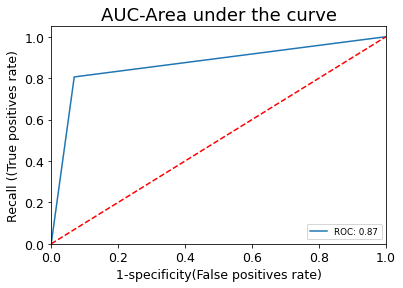

AUC curve:  0.87


In [74]:
#Libraries import
from sklearn.metrics import roc_curve

#AUC Curve Plot
#Model application
Model_used_no_fit = forest(max_depth =None, min_samples_leaf =1, n_estimators=100, random_state = 99)
Model_used = Model_used_no_fit.fit(Xtrain,Ytrain)

false_positives_rate, true_positives_rate, threshold = roc_curve(Yvalidation,Model_used.predict(Xvalidation))  
auc_curve = np.round(roc_auc_score(Yvalidation,Model_used_no_fit.predict(Xvalidation)),2)
plt.plot(false_positives_rate, true_positives_rate, label="ROC: "+str(auc_curve))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-specificity(False positives rate)')
plt.ylabel('Recall ((True positives rate)')
plt.title('AUC-Area under the curve')
plt.rcParams.update({'font.size': 15})
plt.legend(loc="lower right", fontsize ='xx-small')
plt.show()   # Display
print("AUC curve: ",np.round(auc_curve,2))

#### Feature Importance

Execution time: 0:00:00.353799


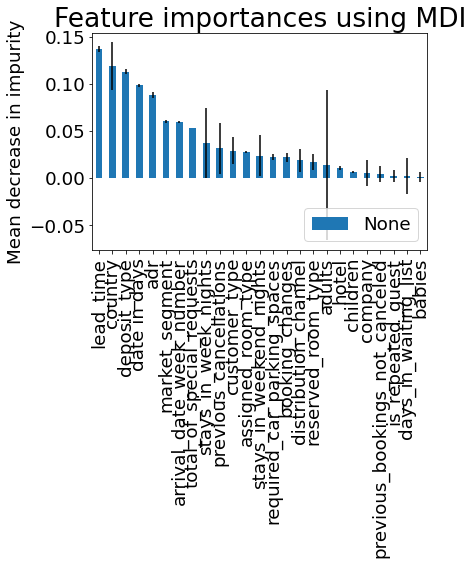

<Figure size 648x576 with 0 Axes>

In [73]:
start=date.now()

importances = Model_used.feature_importances_
std = np.std([tree.feature_importances_ for tree in Model_used.estimators_], axis=0)
forest_importances = pd.Series(importances, index=Xtest.columns)
forest_importances = forest_importances.sort_values(ascending=False)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.legend(loc="lower right", fontsize ='small')
plt.rc('xtick', labelsize="small") 
plt.rc('ytick', labelsize="small")
plt.rc('axes', labelsize="small")
plt.figure(figsize=(9,8));
plt.rcParams.update({'font.size': 15})
fig.tight_layout();

end=date.now()
print("Execution time: {}".format(end-start))